### 라이브러리 정의

In [ ]:
### Machine Running library install
from sklearn.neighbors import KNeighborsRegressor

### 선형, 다중, 다항 회귀모델 라이브러리 정의
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

### 앙상블 모델
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import HistGradientBoostingRegressor
from xgboost import XGBRegressor

### visualization library
import matplotlib.pyplot as plt

# Definition of the NumPy library
import numpy as np

### Definition of Library (Preprocessing Library)
from sklearn.model_selection import train_test_split

### 평가 라이브러리 정의
# 평균절대오차(MAE)
from sklearn.metrics import mean_absolute_error
# 평균제곱오차(MSE)
from sklearn.metrics import mean_squared_error
# 결정계수(R2-score)
from sklearn.metrics import r2_score

# - 변환기 모델(클래스) 라이브러리 정의하기
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

import pandas as pd 

import seaborn as sns

### 라이브러리 정의
from scipy.stats import spearmanr

### 라이브러리 정의
from scipy.stats import pearsonr

### 하이퍼파라미터 튜닝 모델(클래스) 정의하기
from sklearn.model_selection import GridSearchCV

plt.rc("font", family="Malgun Gothic")

plt.rcParams["axes.unicode_minus"] = False

### 경고 메시지 없애기
# - 사이킷런 버전에 따라 오류가 아니니 안내(경고)메시지가 자주 나타남
# - 안내(경고) 메시지 없이 실행할 수 있도록 처리
from sklearn import set_config
set_config(display="text")


### 파일 불러들이기

In [2]:
# 파일 불러들이기
file_path = "./data/04_(실습)_회귀모델_drinking_water.csv"

df = pd.read_csv(file_path)
df.info()
df.head(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   친밀도     264 non-null    int64
 1   적절성     264 non-null    int64
 2   만족도     264 non-null    int64
dtypes: int64(3)
memory usage: 6.3 KB


,친밀도,적절성,만족도
0,3,4,3
1,3,3,2


In [3]:
df.describe()

,친밀도,적절성,만족도
count,264.000000,264.000000,264.000000
mean,2.928030,3.132576,3.094697
std,0.970345,0.859657,0.828744
min,1.000000,1.000000,1.000000
25%,2.000000,3.000000,3.000000
50%,3.000000,3.000000,3.000000
75%,4.000000,4.000000,4.000000
max,5.000000,5.000000,5.000000


In [4]:
### 상관관계 표: corr() 함수 사용(데이터프레임에 포함되어 있음)
correlation_matrix = df.corr()
correlation_matrix

,친밀도,적절성,만족도
친밀도,1.000000,0.499209,0.467145
적절성,0.499209,1.000000,0.766853
만족도,0.467145,0.766853,1.000000


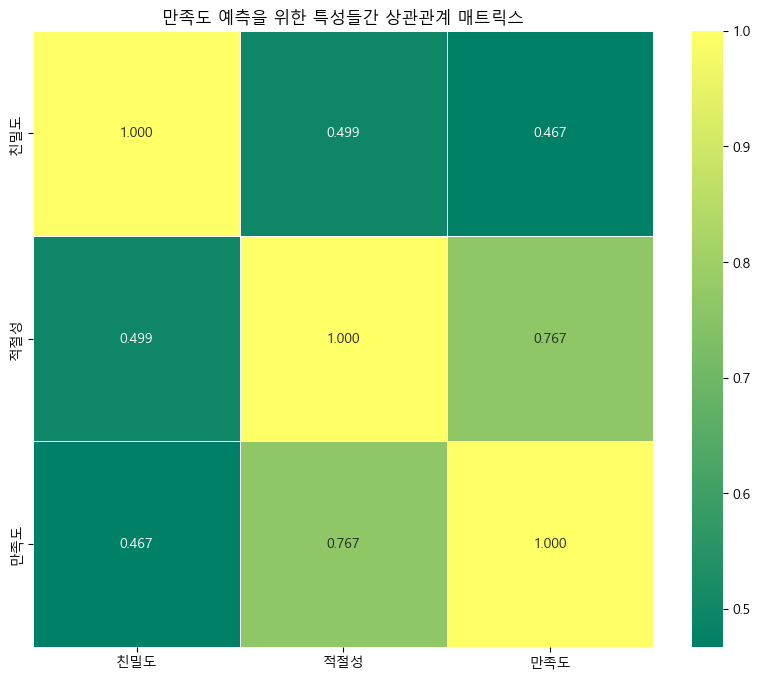

In [5]:
plt.figure(figsize=(10,8))
plt.title("만족도 예측을 위한 특성들간 상관관계 매트릭스")

sns.heatmap(correlation_matrix, annot=True, fmt=".3f", cmap="summer", linewidths=0.5)

plt.show()

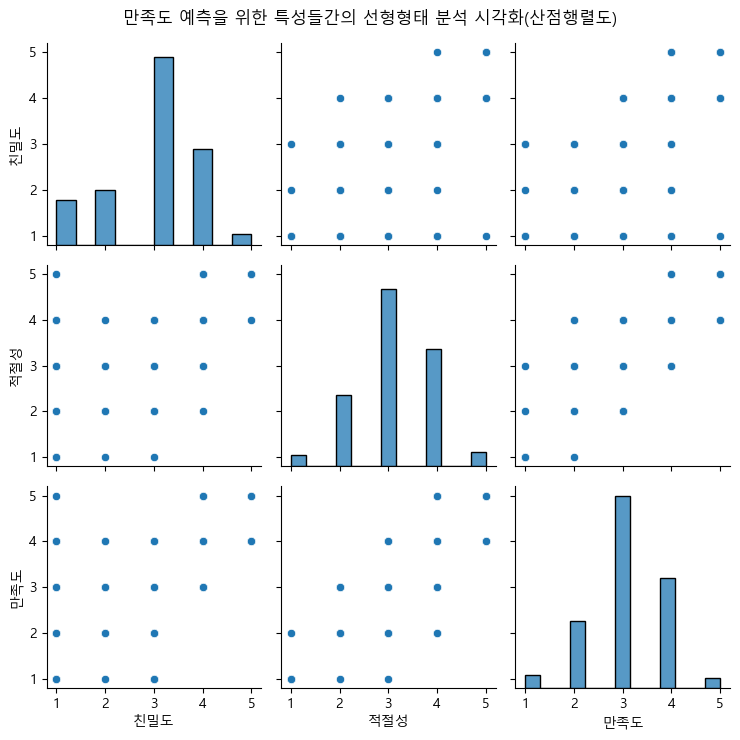

In [6]:
### 산점행렬도: 모든 특성들간의 관계를 산점도로 표현한 그래프
sns.pairplot(df)
plt.suptitle("만족도 예측을 위한 특성들간의 선형형태 분석 시각화(산점행렬도)")
plt.tight_layout()
plt.show()

### (해석)
# - 만족도를 기준으로 친밀도, 적절성 각각의 특성간의 선형관계를 확인한 결과
# - 친밀도와의 관계는 고른 우상향 관계를 나타내고 있으며,
# - 적절성과의 관계의 경우에도 친밀도와 비슷하게 고른 우상향 관계를 나타내고 있다.
# - 만족도를 예측하기 위한 특성들로 만족도와 친밀도를를 이용하여
#   분석을 진행할 경우, 모든 관계성이 선형분포를 나타내고 있으며,
#   종속변수로 사용한 주택가격의 데이터 형태가 연속형 데이터로,
#  -> 회귀분석으로 진행하는 것을 추천함


In [7]:
### 독립변수와 종속변수로 분리하기
# 독립변수명: X(대문자)
X = df.iloc[:, :-1]

# 종속변수명: y(소문자)
y = df["만족도"]

print(X.head(2))
print(y.head(2))

   친밀도  적절성
0    3    4
1    3    3
0    3
1    2
Name: 만족도, dtype: int64


In [8]:
### 독립변수 이름 추출하기
X_columns_nm = X.columns

### 독립변수 "친밀도"과 종속변수 "만족도"과의 상관관계 검증(유의미성 확인)
X[X_columns_nm[0]]

spearmanr(X[X_columns_nm[0]], y)

### (해석)
# - 결과값: 상관관계 계수(statistic), 유의미계수(pvalue)
# - 해석: 독립변수 "친밀도"과 종속변수 "만족도" 간의 스피어만 상관관계 검증 결과
#         p-value의 값이 0.000000000000000003383를 나타내고 있음
#         이는 p-value > 0.05 만족하므로 유의미한 특성이라고 판단됨

### 모든 독립변수 각각에 대하여 종속변수와의 상관관계 유의미성을 확인
for col in X_columns_nm:
    stat, p_value = spearmanr(X[col], y)
    p_msg = "유의미 하지 않음"

    if p_value < 0.5 :
        p_msg = "유의미 함"


    msg = f"""
    독립변수({col})와 종속변수(만족도)의 상관관계 계수는 {stat:.3f}이고, 
    p-value의 값은 {p_value}임. 따라서 p-value < 0.05에 대하여 {p_msg}
    """

    print(msg)


    독립변수(친밀도)와 종속변수(만족도)의 상관관계 계수는 0.501이고, 
    p-value의 값은 3.383407076477574e-18임. 따라서 p-value < 0.05에 대하여 유의미 함
    

    독립변수(적절성)와 종속변수(만족도)의 상관관계 계수는 0.749이고, 
    p-value의 값은 1.1877299204509877e-48임. 따라서 p-value < 0.05에 대하여 유의미 함
    


In [9]:
### 훈련 : 테스트 = 7.5 : 2.5 비율로 분류
# <사용 변수명>
# - 훈련 독립변수 / 종속변수 = X_train / y_train
# - 테스트 독립변수 / 종속변수 = X_val / y_val

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print(f"훈련 독립변수/종속변수{X_train.shape}/{y_train.shape}")
print(f"테스트 독립변수/종속변수{X_test.shape}/{y_test.shape}")

훈련 독립변수/종속변수(198, 2)/(198,)
테스트 독립변수/종속변수(66, 2)/(66,)


### 성능 적용 전 훈련 평가

In [10]:
# 데이터프레임 생성
df_org_list = []

# 딕셔너리 대표 변수 정의
results_org = {}

# 모델 리스트
kn_reg = KNeighborsRegressor() 
lr_reg = LinearRegression()
ridge  = Ridge()
lasso  = Lasso()
rf_reg = RandomForestRegressor(random_state=42)
et_reg = ExtraTreesRegressor(random_state=42)
gb_reg = GradientBoostingRegressor(random_state=42)
hb_reg = HistGradientBoostingRegressor(random_state=42)
xg_reg = XGBRegressor()

models = [kn_reg, lr_reg, ridge, lasso, rf_reg, et_reg, gb_reg, hb_reg, xg_reg]

# 각 모델에 대해 훈련, 예측, 성능 평가를 수행
for model in models:
    # 모델 훈련
    model.fit(X_train, y_train)
    
    # 모델명을 키로 하여 results에 저장
    results_org[model.__class__.__name__] = model

    # 훈련 데이터와 테스트 데이터 예측
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    
    # 평가 지표 출력
    print(f"================ {model.__class__.__name__} ================") 
    
    # 평균절대오차(MAE)
    print("---------- mean_absolute_error ----------")
    train_mae = mean_absolute_error(y_train, train_pred)
    test_mae = mean_absolute_error(y_test, test_pred)
    print(f"훈련 데이터 평균절대오차: {train_mae}")
    print(f"검증 데이터 평균절대오차: {test_mae}")
    
    # 평균제곱오차(MSE)
    print("---------- mean_squared_error ----------")
    train_mse = mean_squared_error(y_train, train_pred)
    test_mse = mean_squared_error(y_test, test_pred)
    print(f"훈련 데이터 평균제곱오차: {train_mse}")
    print(f"검증 데이터 평균제곱오차: {test_mse}")
    
    # 결정계수(R2)
    print("--------------- r2_score ---------------")
    train_r2 = r2_score(y_train, train_pred)
    test_r2 = r2_score(y_test, test_pred)
    print(f"훈련 데이터 결정계수: {train_r2}")
    print(f"검증 데이터 결정계수: {test_r2}")
    
    # 결정계수 차이가 0.05 이하일 경우 유의미하다고 판단
    print("-------------- 유의미 판단 --------------")
    if abs(train_r2 - test_r2) < 0.05:
        print(f"p_value {round(train_r2 - test_r2, 4)} < 0.05 이므로 유의미하다고 판단됨")
    else:
        print(f"p_value {round(train_r2 - test_r2, 4)} > 0.05 이므로 무의미하다고 판단됨")

    print("--------------------------------------------------\n")

    # 결과를 리스트에 저장
    df_org_list.append({
        "best_model_nm": model.__class__.__name__,
        "train_mae": round(train_mae, 4),
        "train_mse": round(train_mse, 4),
        "train_r2": round(train_r2, 4),
        "val_mae": round(test_mae, 4),
        "val_mse": round(test_mse, 4),
        "val_r2": round(test_r2, 4),
        "train_r2-val_r2": round(train_r2 - test_r2, 4)
    })

# 데이터프레임에 결과 저장
df_org = pd.DataFrame(df_org_list)

================ KNeighborsRegressor ================
---------- mean_absolute_error ----------
훈련 데이터 평균절대오차: 0.32929292929292925
검증 데이터 평균절대오차: 0.3636363636363637
---------- mean_squared_error ----------
훈련 데이터 평균제곱오차: 0.2581818181818182
검증 데이터 평균제곱오차: 0.26666666666666666
--------------- r2_score ---------------
훈련 데이터 결정계수: 0.6251894093686355
검증 데이터 결정계수: 0.5909859154929575
-------------- 유의미 판단 --------------
p_value 0.0342 < 0.05 이므로 유의미하다고 판단됨
--------------------------------------------------

================ LinearRegression ================
---------- mean_absolute_error ----------
훈련 데이터 평균절대오차: 0.3846911927147498
검증 데이터 평균절대오차: 0.3769073246868923
---------- mean_squared_error ----------
훈련 데이터 평균제곱오차: 0.28295828329792594
검증 데이터 평균제곱오차: 0.2610530426786978
--------------- r2_score ---------------
훈련 데이터 결정계수: 0.589220642902726
검증 데이터 결정계수: 0.5995961077787295
-------------- 유의미 판단 --------------
p_value -0.0104 < 0.05 이므로 유의미하다고 판단됨
--------------------------------------------

In [11]:
df_org

,best_model_nm,train_mae,train_mse,train_r2,val_mae,val_mse,val_r2,train_r2-val_r2
0,KNeighborsRegressor,0.3293,0.2582,0.6252,0.3636,0.2667,0.5910,0.0342
1,LinearRegression,0.3847,0.2830,0.5892,0.3769,0.2611,0.5996,-0.0104
2,Ridge,0.3854,0.2830,0.5892,0.3778,0.2610,0.5996,-0.0104
3,Lasso,0.5937,0.6888,0.0000,0.5926,0.6765,-0.0376,0.0376
4,RandomForestRegressor,0.3468,0.2284,0.6684,0.4046,0.2886,0.5573,0.1111
5,ExtraTreesRegressor,0.3492,0.2282,0.6687,0.4017,0.2832,0.5656,0.1031
6,GradientBoostingRegressor,0.3497,0.2283,0.6685,0.4042,0.2891,0.5566,0.1119
7,HistGradientBoostingRegressor,0.3781,0.2704,0.6075,0.3964,0.3044,0.5331,0.0744
8,XGBRegressor,0.3493,0.2282,0.6687,0.4063,0.2884,0.5576,0.1111


### 특성공학 적용 후 훈련 평가

In [12]:
poly = PolynomialFeatures(degree=2, include_bias=False)

poly.fit(X_train)

X_train_poly = poly.transform(X_train)
X_test_poly = poly.transform(X_test)

print(f"훈련 새로운 특성{X_train_poly.shape} \n테스트 새로운 특성{X_test_poly.shape}")

poly.get_feature_names_out()

훈련 새로운 특성(198, 5) 
테스트 새로운 특성(66, 5)


array(['친밀도', '적절성', '친밀도^2', '친밀도 적절성', '적절성^2'], dtype=object)

In [13]:
# 데이터프레임 생성
df_poly_list = []

# 딕셔너리 대표 변수 정의
results_poly = {}

# 모델 리스트
kn_reg = KNeighborsRegressor() 
lr_reg = LinearRegression()
ridge  = Ridge()
lasso  = Lasso()
rf_reg = RandomForestRegressor(random_state=42)
et_reg = ExtraTreesRegressor(random_state=42)
gb_reg = GradientBoostingRegressor(random_state=42)
hb_reg = HistGradientBoostingRegressor(random_state=42)
xg_reg = XGBRegressor()

models = [kn_reg, lr_reg, ridge, lasso, rf_reg, et_reg, gb_reg, hb_reg, xg_reg]

# 각 모델에 대해 훈련, 예측, 성능 평가를 수행
for model in models:
    # 모델 훈련
    model.fit(X_train_poly, y_train)
    
    # 모델명을 키로 하여 results에 저장
    results_poly[model.__class__.__name__] = model

    # 훈련 데이터와 테스트 데이터 예측
    train_pred = model.predict(X_train_poly)
    test_pred = model.predict(X_test_poly)
    
    # 평가 지표 출력
    print(f"================ {model.__class__.__name__} ================") 
    
    # 평균절대오차(MAE)
    print("---------- mean_absolute_error ----------")
    train_mae = mean_absolute_error(y_train, train_pred)
    test_mae = mean_absolute_error(y_test, test_pred)
    print(f"훈련 데이터 평균절대오차: {train_mae}")
    print(f"검증 데이터 평균절대오차: {test_mae}")
    
    # 평균제곱오차(MSE)
    print("---------- mean_squared_error ----------")
    train_mse = mean_squared_error(y_train, train_pred)
    test_mse = mean_squared_error(y_test, test_pred)
    print(f"훈련 데이터 평균제곱오차: {train_mse}")
    print(f"검증 데이터 평균제곱오차: {test_mse}")
    
    # 결정계수(R2)
    print("--------------- r2_score ---------------")
    train_r2 = r2_score(y_train, train_pred)
    test_r2 = r2_score(y_test, test_pred)
    print(f"훈련 데이터 결정계수: {train_r2}")
    print(f"검증 데이터 결정계수: {test_r2}")
    
    # 결정계수 차이가 0.05 이하일 경우 유의미하다고 판단
    print("-------------- 유의미 판단 --------------")
    if abs(train_r2 - test_r2) < 0.05:
        print(f"p_value {round(train_r2 - test_r2, 4)} < 0.05 이므로 유의미하다고 판단됨")
    else:
        print(f"p_value {round(train_r2 - test_r2, 4)} > 0.05 이므로 무의미하다고 판단됨")

    print("--------------------------------------------------\n")

    # 결과를 리스트에 저장
    df_poly_list.append({
        "best_model_nm": model.__class__.__name__,
        "train_mae": round(train_mae, 4),
        "train_mse": round(train_mse, 4),
        "train_r2": round(train_r2, 4),
        "val_mae": round(test_mae, 4),
        "val_mse": round(test_mse, 4),
        "val_r2": round(test_r2, 4),
        "train_r2-val_r2": round(train_r2 - test_r2, 4)
    })

# 데이터프레임에 결과 저장
df_poly = pd.DataFrame(df_poly_list)

================ KNeighborsRegressor ================
---------- mean_absolute_error ----------
훈련 데이터 평균절대오차: 0.3222222222222222
검증 데이터 평균절대오차: 0.37272727272727274
---------- mean_squared_error ----------
훈련 데이터 평균제곱오차: 0.25191919191919193
검증 데이터 평균제곱오차: 0.27090909090909093
--------------- r2_score ---------------
훈련 데이터 결정계수: 0.6342810590631365
검증 데이터 결정계수: 0.5844788732394364
-------------- 유의미 판단 --------------
p_value 0.0498 < 0.05 이므로 유의미하다고 판단됨
--------------------------------------------------

================ LinearRegression ================
---------- mean_absolute_error ----------
훈련 데이터 평균절대오차: 0.35417540283850035
검증 데이터 평균절대오차: 0.3619008508380416
---------- mean_squared_error ----------
훈련 데이터 평균제곱오차: 0.24632614429751631
검증 데이터 평균제곱오차: 0.2387768225108109
--------------- r2_score ---------------
훈련 데이터 결정계수: 0.6424006605798991
검증 데이터 결정계수: 0.6337634370221505
-------------- 유의미 판단 --------------
p_value 0.0086 < 0.05 이므로 유의미하다고 판단됨
------------------------------------------

In [14]:
df_poly

,best_model_nm,train_mae,train_mse,train_r2,val_mae,val_mse,val_r2,train_r2-val_r2
0,KNeighborsRegressor,0.3222,0.2519,0.6343,0.3727,0.2709,0.5845,0.0498
1,LinearRegression,0.3542,0.2463,0.6424,0.3619,0.2388,0.6338,0.0086
2,Ridge,0.3658,0.2484,0.6394,0.3610,0.2332,0.6423,-0.0029
3,Lasso,0.4553,0.3522,0.4887,0.4540,0.3327,0.4897,-0.0010
4,RandomForestRegressor,0.3479,0.2286,0.6682,0.4035,0.2867,0.5602,0.1080
5,ExtraTreesRegressor,0.3492,0.2282,0.6687,0.4037,0.2865,0.5606,0.1081
6,GradientBoostingRegressor,0.3492,0.2282,0.6687,0.4050,0.2885,0.5574,0.1113
7,HistGradientBoostingRegressor,0.3701,0.2616,0.6202,0.3935,0.3019,0.5370,0.0832
8,XGBRegressor,0.3493,0.2282,0.6687,0.4063,0.2884,0.5576,0.1111


### Standardscaler 스케일링 적용 후 훈련 평가

In [15]:
ss = StandardScaler()

ss.fit(X_train)

X_train_scaled = ss.transform(X_train)
X_test_scaled = ss.transform(X_test)

print(X_train_scaled.shape, y_train.shape)
print(X_test_scaled.shape, y_test.shape)

(198, 2) (198,)
(66, 2) (66,)


In [16]:
# 데이터프레임 생성
df_ss_list = []

# 딕셔너리 대표 변수 정의
results_ss = {}

# 모델 리스트
kn_reg = KNeighborsRegressor() 
lr_reg = LinearRegression()
ridge  = Ridge()
lasso  = Lasso()
rf_reg = RandomForestRegressor(random_state=42)
et_reg = ExtraTreesRegressor(random_state=42)
gb_reg = GradientBoostingRegressor(random_state=42)
hb_reg = HistGradientBoostingRegressor(random_state=42)
xg_reg = XGBRegressor()

models = [kn_reg, lr_reg, ridge, lasso, rf_reg, et_reg, gb_reg, hb_reg, xg_reg]

# 각 모델에 대해 훈련, 예측, 성능 평가를 수행
for model in models:
    # 모델 훈련
    model.fit(X_train_scaled, y_train)
    
    # 모델명을 키로 하여 results에 저장
    results_ss[model.__class__.__name__] = model

    # 훈련 데이터와 테스트 데이터 예측
    train_pred = model.predict(X_train_scaled)
    test_pred = model.predict(X_test_scaled)
    
    # 평가 지표 출력
    print(f"================ {model.__class__.__name__} ================") 
    
    # 평균절대오차(MAE)
    print("---------- mean_absolute_error ----------")
    train_mae = mean_absolute_error(y_train, train_pred)
    test_mae = mean_absolute_error(y_test, test_pred)
    print(f"훈련 데이터 평균절대오차: {train_mae}")
    print(f"검증 데이터 평균절대오차: {test_mae}")
    
    # 평균제곱오차(MSE)
    print("---------- mean_squared_error ----------")
    train_mse = mean_squared_error(y_train, train_pred)
    test_mse = mean_squared_error(y_test, test_pred)
    print(f"훈련 데이터 평균제곱오차: {train_mse}")
    print(f"검증 데이터 평균제곱오차: {test_mse}")
    
    # 결정계수(R2)
    print("--------------- r2_score ---------------")
    train_r2 = r2_score(y_train, train_pred)
    test_r2 = r2_score(y_test, test_pred)
    print(f"훈련 데이터 결정계수: {train_r2}")
    print(f"검증 데이터 결정계수: {test_r2}")
    
    # 결정계수 차이가 0.05 이하일 경우 유의미하다고 판단
    print("-------------- 유의미 판단 --------------")
    if abs(train_r2 - test_r2) < 0.05:
        print(f"p_value {round(train_r2 - test_r2, 4)} < 0.05 이므로 유의미하다고 판단됨")
    else:
        print(f"p_value {round(train_r2 - test_r2, 4)} > 0.05 이므로 무의미하다고 판단됨")

    print("--------------------------------------------------\n")

    # 결과를 리스트에 저장
    df_ss_list.append({
        "best_model_nm": model.__class__.__name__,
        "train_mae": round(train_mae, 4),
        "train_mse": round(train_mse, 4),
        "train_r2": round(train_r2, 4),
        "val_mae": round(test_mae, 4),
        "val_mse": round(test_mse, 4),
        "val_r2": round(test_r2, 4),
        "train_r2-val_r2": round(train_r2 - test_r2, 4)
    })

# 데이터프레임에 결과 저장
df_ss = pd.DataFrame(df_ss_list)

================ KNeighborsRegressor ================
---------- mean_absolute_error ----------
훈련 데이터 평균절대오차: 0.3353535353535354
검증 데이터 평균절대오차: 0.3757575757575758
---------- mean_squared_error ----------
훈련 데이터 평균제곱오차: 0.26828282828282823
검증 데이터 평균제곱오차: 0.27999999999999997
--------------- r2_score ---------------
훈련 데이터 결정계수: 0.6105254582484727
검증 데이터 결정계수: 0.5705352112676056
-------------- 유의미 판단 --------------
p_value 0.04 < 0.05 이므로 유의미하다고 판단됨
--------------------------------------------------

================ LinearRegression ================
---------- mean_absolute_error ----------
훈련 데이터 평균절대오차: 0.38469119271474944
검증 데이터 평균절대오차: 0.3769073246868921
---------- mean_squared_error ----------
훈련 데이터 평균제곱오차: 0.282958283297926
검증 데이터 평균제곱오차: 0.2610530426786976
--------------- r2_score ---------------
훈련 데이터 결정계수: 0.5892206429027258
검증 데이터 결정계수: 0.5995961077787298
-------------- 유의미 판단 --------------
p_value -0.0104 < 0.05 이므로 유의미하다고 판단됨
----------------------------------------------

In [17]:
df_ss

,best_model_nm,train_mae,train_mse,train_r2,val_mae,val_mse,val_r2,train_r2-val_r2
0,KNeighborsRegressor,0.3354,0.2683,0.6105,0.3758,0.2800,0.5705,0.0400
1,LinearRegression,0.3847,0.2830,0.5892,0.3769,0.2611,0.5996,-0.0104
2,Ridge,0.3852,0.2830,0.5892,0.3776,0.2610,0.5996,-0.0104
3,Lasso,0.5937,0.6888,0.0000,0.5926,0.6765,-0.0376,0.0376
4,RandomForestRegressor,0.3475,0.2286,0.6681,0.4046,0.2886,0.5573,0.1108
5,ExtraTreesRegressor,0.3492,0.2282,0.6687,0.4017,0.2832,0.5656,0.1031
6,GradientBoostingRegressor,0.3497,0.2283,0.6685,0.4042,0.2891,0.5566,0.1119
7,HistGradientBoostingRegressor,0.3781,0.2704,0.6075,0.3964,0.3044,0.5331,0.0744
8,XGBRegressor,0.3493,0.2282,0.6687,0.4063,0.2884,0.5576,0.1111


### MinMaxscaler 스케일링 적용 후 훈련 평가

In [18]:
mm = MinMaxScaler()

mm.fit(X_train)

X_train_mm = mm.transform(X_train)
X_test_mm = mm.transform(X_test)

print(X_train_mm.shape, y_train.shape)
print(X_test_mm.shape, y_test.shape)

(198, 2) (198,)
(66, 2) (66,)


In [19]:
# 데이터프레임 생성
df_mm_list = []

# 딕셔너리 대표 변수 정의
results_mm = {}

# 모델 리스트
kn_reg = KNeighborsRegressor() 
lr_reg = LinearRegression()
ridge  = Ridge()
lasso  = Lasso()
rf_reg = RandomForestRegressor(random_state=42)
et_reg = ExtraTreesRegressor(random_state=42)
gb_reg = GradientBoostingRegressor(random_state=42)
hb_reg = HistGradientBoostingRegressor(random_state=42)
xg_reg = XGBRegressor()

models = [kn_reg, lr_reg, ridge, lasso, rf_reg, et_reg, gb_reg, hb_reg, xg_reg]

# 각 모델에 대해 훈련, 예측, 성능 평가를 수행
for model in models:
    # 모델 훈련
    model.fit(X_train_mm, y_train)
    
    # 모델명을 키로 하여 results에 저장
    results_mm[model.__class__.__name__] = model

    # 훈련 데이터와 테스트 데이터 예측
    train_pred = model.predict(X_train_mm)
    test_pred = model.predict(X_test_mm)
    
    # 평가 지표 출력
    print(f"================ {model.__class__.__name__} ================") 
    
    # 평균절대오차(MAE)
    print("---------- mean_absolute_error ----------")
    train_mae = mean_absolute_error(y_train, train_pred)
    test_mae = mean_absolute_error(y_test, test_pred)
    print(f"훈련 데이터 평균절대오차: {train_mae}")
    print(f"검증 데이터 평균절대오차: {test_mae}")
    
    # 평균제곱오차(MSE)
    print("---------- mean_squared_error ----------")
    train_mse = mean_squared_error(y_train, train_pred)
    test_mse = mean_squared_error(y_test, test_pred)
    print(f"훈련 데이터 평균제곱오차: {train_mse}")
    print(f"검증 데이터 평균제곱오차: {test_mse}")
    
    # 결정계수(R2)
    print("--------------- r2_score ---------------")
    train_r2 = r2_score(y_train, train_pred)
    test_r2 = r2_score(y_test, test_pred)
    print(f"훈련 데이터 결정계수: {train_r2}")
    print(f"검증 데이터 결정계수: {test_r2}")
    
    # 결정계수 차이가 0.05 이하일 경우 유의미하다고 판단
    print("-------------- 유의미 판단 --------------")
    if abs(train_r2 - test_r2) < 0.05:
        print(f"p_value {round(train_r2 - test_r2, 4)} < 0.05 이므로 유의미하다고 판단됨")
    else:
        print(f"p_value {round(train_r2 - test_r2, 4)} > 0.05 이므로 무의미하다고 판단됨")

    print("--------------------------------------------------\n")

    # 결과를 리스트에 저장
    df_mm_list.append({
        "best_model_nm": model.__class__.__name__,
        "train_mae": round(train_mae, 4),
        "train_mse": round(train_mse, 4),
        "train_r2": round(train_r2, 4),
        "val_mae": round(test_mae, 4),
        "val_mse": round(test_mse, 4),
        "val_r2": round(test_r2, 4),
        "train_r2-val_r2": round(train_r2 - test_r2, 4)
    })

# 데이터프레임에 결과 저장
df_mm = pd.DataFrame(df_mm_list)

================ KNeighborsRegressor ================
---------- mean_absolute_error ----------
훈련 데이터 평균절대오차: 0.32929292929292925
검증 데이터 평균절대오차: 0.3636363636363637
---------- mean_squared_error ----------
훈련 데이터 평균제곱오차: 0.2581818181818182
검증 데이터 평균제곱오차: 0.26666666666666666
--------------- r2_score ---------------
훈련 데이터 결정계수: 0.6251894093686355
검증 데이터 결정계수: 0.5909859154929575
-------------- 유의미 판단 --------------
p_value 0.0342 < 0.05 이므로 유의미하다고 판단됨
--------------------------------------------------

================ LinearRegression ================
---------- mean_absolute_error ----------
훈련 데이터 평균절대오차: 0.3846911927147496
검증 데이터 평균절대오차: 0.37690732468689214
---------- mean_squared_error ----------
훈련 데이터 평균제곱오차: 0.28295828329792594
검증 데이터 평균제곱오차: 0.26105304267869767
--------------- r2_score ---------------
훈련 데이터 결정계수: 0.589220642902726
검증 데이터 결정계수: 0.5995961077787297
-------------- 유의미 판단 --------------
p_value -0.0104 < 0.05 이므로 유의미하다고 판단됨
------------------------------------------

In [20]:
df_mm

,best_model_nm,train_mae,train_mse,train_r2,val_mae,val_mse,val_r2,train_r2-val_r2
0,KNeighborsRegressor,0.3293,0.2582,0.6252,0.3636,0.2667,0.5910,0.0342
1,LinearRegression,0.3847,0.2830,0.5892,0.3769,0.2611,0.5996,-0.0104
2,Ridge,0.3952,0.2866,0.5839,0.3898,0.2641,0.5949,-0.0110
3,Lasso,0.5937,0.6888,0.0000,0.5926,0.6765,-0.0376,0.0376
4,RandomForestRegressor,0.3468,0.2284,0.6684,0.4046,0.2886,0.5573,0.1111
5,ExtraTreesRegressor,0.3492,0.2282,0.6687,0.4017,0.2832,0.5656,0.1031
6,GradientBoostingRegressor,0.3497,0.2283,0.6685,0.4042,0.2891,0.5566,0.1119
7,HistGradientBoostingRegressor,0.3781,0.2704,0.6075,0.3964,0.3044,0.5331,0.0744
8,XGBRegressor,0.3493,0.2282,0.6687,0.4063,0.2884,0.5576,0.1111


### Robustscaler 스케일링 적용 후 훈련 평가

In [21]:
rs = RobustScaler()

rs.fit(X_train)

X_train_rs = rs.transform(X_train)
X_test_rs = rs.transform(X_test)

print(X_train_rs.shape, y_train.shape)
print(X_test_rs.shape, y_test.shape)

(198, 2) (198,)
(66, 2) (66,)


In [22]:
# 데이터프레임 생성
df_rs_list = []

# 딕셔너리 대표 변수 정의
results_rs = {}

# 모델 리스트
kn_reg = KNeighborsRegressor() 
lr_reg = LinearRegression()
ridge  = Ridge()
lasso  = Lasso()
rf_reg = RandomForestRegressor(random_state=42)
et_reg = ExtraTreesRegressor(random_state=42)
gb_reg = GradientBoostingRegressor(random_state=42)
hb_reg = HistGradientBoostingRegressor(random_state=42)
xg_reg = XGBRegressor()

models = [kn_reg, lr_reg, ridge, lasso, rf_reg, et_reg, gb_reg, hb_reg, xg_reg]

# 각 모델에 대해 훈련, 예측, 성능 평가를 수행
for model in models:
    # 모델 훈련
    model.fit(X_train_rs, y_train)
    
    # 모델명을 키로 하여 results에 저장
    results_mm[model.__class__.__name__] = model

    # 훈련 데이터와 테스트 데이터 예측
    train_pred = model.predict(X_train_rs)
    test_pred = model.predict(X_test_rs)
    
    # 평가 지표 출력
    print(f"================ {model.__class__.__name__} ================") 
    
    # 평균절대오차(MAE)
    print("---------- mean_absolute_error ----------")
    train_mae = mean_absolute_error(y_train, train_pred)
    test_mae = mean_absolute_error(y_test, test_pred)
    print(f"훈련 데이터 평균절대오차: {train_mae}")
    print(f"검증 데이터 평균절대오차: {test_mae}")
    
    # 평균제곱오차(MSE)
    print("---------- mean_squared_error ----------")
    train_mse = mean_squared_error(y_train, train_pred)
    test_mse = mean_squared_error(y_test, test_pred)
    print(f"훈련 데이터 평균제곱오차: {train_mse}")
    print(f"검증 데이터 평균제곱오차: {test_mse}")
    
    # 결정계수(R2)
    print("--------------- r2_score ---------------")
    train_r2 = r2_score(y_train, train_pred)
    test_r2 = r2_score(y_test, test_pred)
    print(f"훈련 데이터 결정계수: {train_r2}")
    print(f"검증 데이터 결정계수: {test_r2}")
    
    # 결정계수 차이가 0.05 이하일 경우 유의미하다고 판단
    print("-------------- 유의미 판단 --------------")
    if abs(train_r2 - test_r2) < 0.05:
        print(f"p_value {round(train_r2 - test_r2, 4)} < 0.05 이므로 유의미하다고 판단됨")
    else:
        print(f"p_value {round(train_r2 - test_r2, 4)} > 0.05 이므로 무의미하다고 판단됨")

    print("--------------------------------------------------\n")

    # 결과를 리스트에 저장
    df_rs_list.append({
        "best_model_nm": model.__class__.__name__,
        "train_mae": round(train_mae, 4),
        "train_mse": round(train_mse, 4),
        "train_r2": round(train_r2, 4),
        "val_mae": round(test_mae, 4),
        "val_mse": round(test_mse, 4),
        "val_r2": round(test_r2, 4),
        "train_r2-val_r2": round(train_r2 - test_r2, 4)
    })

# 데이터프레임에 결과 저장
df_rs = pd.DataFrame(df_rs_list)

================ KNeighborsRegressor ================
---------- mean_absolute_error ----------
훈련 데이터 평균절대오차: 0.32929292929292925
검증 데이터 평균절대오차: 0.3636363636363637
---------- mean_squared_error ----------
훈련 데이터 평균제곱오차: 0.2581818181818182
검증 데이터 평균제곱오차: 0.26666666666666666
--------------- r2_score ---------------
훈련 데이터 결정계수: 0.6251894093686355
검증 데이터 결정계수: 0.5909859154929575
-------------- 유의미 판단 --------------
p_value 0.0342 < 0.05 이므로 유의미하다고 판단됨
--------------------------------------------------

================ LinearRegression ================
---------- mean_absolute_error ----------
훈련 데이터 평균절대오차: 0.3846911927147496
검증 데이터 평균절대오차: 0.3769073246868922
---------- mean_squared_error ----------
훈련 데이터 평균제곱오차: 0.2829582832979259
검증 데이터 평균제곱오차: 0.26105304267869767
--------------- r2_score ---------------
훈련 데이터 결정계수: 0.589220642902726
검증 데이터 결정계수: 0.5995961077787297
-------------- 유의미 판단 --------------
p_value -0.0104 < 0.05 이므로 유의미하다고 판단됨
--------------------------------------------

In [23]:
df_rs

,best_model_nm,train_mae,train_mse,train_r2,val_mae,val_mse,val_r2,train_r2-val_r2
0,KNeighborsRegressor,0.3293,0.2582,0.6252,0.3636,0.2667,0.5910,0.0342
1,LinearRegression,0.3847,0.2830,0.5892,0.3769,0.2611,0.5996,-0.0104
2,Ridge,0.3854,0.2830,0.5892,0.3778,0.2610,0.5996,-0.0104
3,Lasso,0.5937,0.6888,0.0000,0.5926,0.6765,-0.0376,0.0376
4,RandomForestRegressor,0.3468,0.2284,0.6684,0.4046,0.2886,0.5573,0.1111
5,ExtraTreesRegressor,0.3492,0.2282,0.6687,0.4017,0.2832,0.5656,0.1031
6,GradientBoostingRegressor,0.3497,0.2283,0.6685,0.4042,0.2891,0.5566,0.1119
7,HistGradientBoostingRegressor,0.3781,0.2704,0.6075,0.3964,0.3044,0.5331,0.0744
8,XGBRegressor,0.3493,0.2282,0.6687,0.4063,0.2884,0.5576,0.1111


### 하이퍼파라미터 적용 후 훈련 평가

In [24]:
# 데이터프레임 생성
df_hp_list = []

# 딕셔너리 대표 변수 정의
results_hp= {}

# KNeighborsRegressor의 하이퍼파라미터 설정
gridParams_kn = {
    "n_neighbors": [3, 5, 7, 9, 11, 13],  # 이웃의 개수 (홀수로 설정)
    "weights": ["uniform", "distance"],   # 가중치 설정
    "algorithm": ["auto", "ball_tree", "kd_tree", "brute"],  # 알고리즘 선택
    "leaf_size": [10, 20, 30]  # BallTree/KDTree에서 사용할 leaf 크기
}


# LinearRegression, Ridge, Lasso의 하이퍼파라미터 설정
gridParams = {
    "fit_intercept": [True, False],
    "positive": [True, False]
}

# GradientBoostingRegressor의 하이퍼파라미터 설정
gridParams_gb = {
    "n_estimators" : [50, 100],
    "max_depth"    : [None, 3, 10],
    "learning_rate": [0.01, 0.1, 0.2]
}

# HistGradientBoostingRegressor의 하이퍼파라미터 설정
gridParams_hb = {
    "max_iter"      : [50, 100],
    "max_depth"     : [None, 3, 10],
    "learning_rate" : [0.01, 0.1, 0.2]
}

# RandomForestRegressor, XGBRegressor, ExtraTree의 하이퍼파라미터 설정
gridParams_rfxe = {
    "n_estimators" : [50, 100],
    "max_depth"    : [None, 3, 10]
}


### GridSearchCV 튜닝 모델에 대한 속성 정의하기
scoring = ["neg_mean_squared_error", "r2"]

# 모델 선정 기준 정의하기: 평가방법 중에 선정 기준으로 사용할 평가방법을 선정()
refit = "r2"

### GridSearchCV 튜닝 모델에서 교차검증에 사용할 그룹(Fold)의 갯수 지정
cv = 5

# CPU Core(코어) 사용 갯수 정의하기
n_jobs = -1


# 모델 리스트
kn_reg = KNeighborsRegressor() 
lr_reg = LinearRegression()
ridge  = Ridge()
lasso  = Lasso()
rf_reg = RandomForestRegressor(random_state=42)
et_reg = ExtraTreesRegressor(random_state=42)
gb_reg = GradientBoostingRegressor(random_state=42)
hb_reg = HistGradientBoostingRegressor(random_state=42)
xg_reg = XGBRegressor()

models = [
    (kn_reg, gridParams_kn),
    (lr_reg, gridParams),
    (ridge, gridParams), 
    (lasso, gridParams),
    (rf_reg, gridParams_rfxe),
    (et_reg, gridParams_rfxe),
    (gb_reg, gridParams_gb), 
    (hb_reg, gridParams_hb),
    (xg_reg, gridParams_rfxe),
     ]

for model, params in models:
    ### 튜닝 모델(클래스) 생성하기 (모델 생성과 같음)
    grid_search_model = GridSearchCV(
        # 튜닝에 사용할 모델 설정
        estimator = model,
        # 위에서 정의한 하이퍼파라미터터 설정
        param_grid = params,
        # 모델 평가방법 설정
        scoring = scoring,
        # 모델 선정 기준 설정
        refit = refit,
        # 교차검증에 사용할 Fold 갯수 설정
        cv = cv,
        # CPU Core(코어) 갯수 설정
        n_jobs = n_jobs
    )

    
    ### 튜닝 모델 훈련시키기
    grid_search_model.fit(X_train, y_train)

    ### 튜닝 결과 확인하기
    ### 최적의 하이퍼파라미터 확인하기
    best_params = grid_search_model.best_params_
    
    ### 최적의 성능(결정계수) 확인하기
    best_score = grid_search_model.best_score_
    
    ### 최적의 모델 확인하기
    best_model = grid_search_model.best_estimator_

    # 모델명을 키로 하여 results에 저장
    results_hp[best_model.__class__.__name__] = best_model

    train_pred = best_model.predict(X_train)
    test_pred = best_model.predict(X_test)
    
    ### 평가 지표 출력
    print(f"================{best_model.__class__.__name__}===============")

    print(f"최적의 하이퍼파라미터: {best_params}")
    print(f"최적의 성능(결정계수): {best_score:.5f}")
    print(f"최적의 모델: {best_model.__class__.__name__}")

    
    ### 평균절대오차(MAE)
    print("---------- mean_absolute_error ----------")
    
    train_mae = mean_absolute_error(y_train, train_pred)
    test_mae   = mean_absolute_error(y_test, test_pred)
    
    print(f"훈련 데이터 평균절대오차: {train_mae}")
    print(f"검증 데이터 평균절대오차: {test_mae}")
    
    
    ### 평균제곱오차(MSE)
    print("---------- mean_squared_error ----------")
    train_mse = mean_squared_error(y_train, train_pred)
    test_mse   = mean_squared_error(y_test, test_pred)
    
    print(f"훈련 데이터 평균절대오차: {train_mse}")
    print(f"검증 데이터 평균절대오차: {test_mse}")
    
    ### 결정계수(R2)
    print("--------------- r2_score ---------------")
    
    train_r2 = r2_score(y_train, train_pred)
    test_r2   = r2_score(y_test, test_pred)
    
    print(f"훈련 데이터 결정계수: {train_r2}")
    print(f"검증 데이터 결정계수: {test_r2}")
    
    # 결정계수 차이가 0.05 이하일 경우 유의미하다고 판단
    print("-------------- 유의미 판단 --------------")
    if train_r2 - test_r2 < 0.05:
        print(f"p_value {round(train_r2 - test_r2, 4)} < 0.05 이므로 유의미하다고 판단됨")
    
    else :
        print(f"p_value {round(train_r2 - test_r2, 4)} > 0.05 이므로 무의미하다고 판단됨")

    print("--------------------------------------------------")
    print("")
    print("")
    

    df_hp_list.append({
        "best_model_nm"  : best_model.__class__.__name__,
        "train_mae"      : (round(train_mae, 4)),
        "train_mse"      : (round(train_mse, 4)),
        "train_r2"       : (round(train_r2, 4)),
        "val_mae"        : (round(test_mae, 4)),
        "val_mse"        : (round(test_mse, 4)),
        "val_r2"         : (round(test_r2, 4)),
        "train_r2-val_r2": (round(train_r2 - test_r2, 4))
    })

### 데이터프레임에 저장하기
df_hp = pd.DataFrame(df_hp_list)

================KNeighborsRegressor===============
최적의 하이퍼파라미터: {'algorithm': 'brute', 'leaf_size': 10, 'n_neighbors': 11, 'weights': 'uniform'}
최적의 성능(결정계수): 0.54731
최적의 모델: KNeighborsRegressor
---------- mean_absolute_error ----------
훈련 데이터 평균절대오차: 0.3489439853076216
검증 데이터 평균절대오차: 0.38567493112947654
---------- mean_squared_error ----------
훈련 데이터 평균절대오차: 0.2647967276066449
검증 데이터 평균절대오차: 0.28600050087653395
--------------- r2_score ---------------
훈련 데이터 결정계수: 0.6155863392301091
검증 데이터 결정계수: 0.5613316261203583
-------------- 유의미 판단 --------------
p_value 0.0543 > 0.05 이므로 무의미하다고 판단됨
--------------------------------------------------


================LinearRegression===============
최적의 하이퍼파라미터: {'fit_intercept': True, 'positive': True}
최적의 성능(결정계수): 0.53933
최적의 모델: LinearRegression
---------- mean_absolute_error ----------
훈련 데이터 평균절대오차: 0.38469119271474944
검증 데이터 평균절대오차: 0.376907324686892
---------- mean_squared_error ----------
훈련 데이터 평균절대오차: 0.28295828329792594
검증 데이터 평균절대오차: 0

In [25]:
df_hp

,best_model_nm,train_mae,train_mse,train_r2,val_mae,val_mse,val_r2,train_r2-val_r2
0,KNeighborsRegressor,0.3489,0.2648,0.6156,0.3857,0.2860,0.5613,0.0543
1,LinearRegression,0.3847,0.2830,0.5892,0.3769,0.2611,0.5996,-0.0104
2,Ridge,0.3854,0.2830,0.5892,0.3778,0.2610,0.5996,-0.0104
3,Lasso,0.5518,0.4154,0.3970,0.6202,0.5216,0.2000,0.1970
4,RandomForestRegressor,0.3566,0.2351,0.6587,0.4038,0.2842,0.5641,0.0946
5,ExtraTreesRegressor,0.3732,0.2533,0.6323,0.3945,0.2698,0.5863,0.0461
6,GradientBoostingRegressor,0.3503,0.2287,0.6680,0.4031,0.2878,0.5586,0.1094
7,HistGradientBoostingRegressor,0.3738,0.2687,0.6099,0.3953,0.3016,0.5374,0.0725
8,XGBRegressor,0.3492,0.2282,0.6686,0.4047,0.2883,0.5578,0.1108


### 특성공학 & StandardScaler 스케일링 적용 후 훈련 평가

In [26]:
poly = PolynomialFeatures(degree=2, include_bias=False)

poly.fit(X_train)

X_train_poly = poly.transform(X_train)
X_test_poly = poly.transform(X_test)

print(f"훈련 새로운 특성{X_train_poly.shape} \n테스트 새로운 특성{X_test_poly.shape}")

poly.get_feature_names_out()

훈련 새로운 특성(198, 5) 
테스트 새로운 특성(66, 5)


array(['친밀도', '적절성', '친밀도^2', '친밀도 적절성', '적절성^2'], dtype=object)

In [27]:
polyss = StandardScaler()

polyss.fit(X_train_poly)

X_train_polyscaled = polyss.transform(X_train_poly)
X_test_polyscaled = polyss.transform(X_test_poly)

print(X_train_polyscaled.shape, y_train.shape)
print(X_test_polyscaled.shape, y_test.shape)

(198, 5) (198,)
(66, 5) (66,)


In [28]:
# 데이터프레임 생성
df_polyss_list = []

# 딕셔너리 대표 변수 정의
results_polyss = {}

# 모델 리스트
kn_reg = KNeighborsRegressor() 
lr_reg = LinearRegression()
ridge  = Ridge()
lasso  = Lasso()
rf_reg = RandomForestRegressor(random_state=42)
et_reg = ExtraTreesRegressor(random_state=42)
gb_reg = GradientBoostingRegressor(random_state=42)
hb_reg = HistGradientBoostingRegressor(random_state=42)
xg_reg = XGBRegressor()

models = [kn_reg, lr_reg, ridge, lasso, rf_reg, et_reg, gb_reg, hb_reg, xg_reg]

# 각 모델에 대해 훈련, 예측, 성능 평가를 수행
for model in models:
    # 모델 훈련
    model.fit(X_train_polyscaled, y_train)
    
    # 모델명을 키로 하여 results에 저장
    results_polyss[model.__class__.__name__] = model

    # 훈련 데이터와 테스트 데이터 예측
    train_pred = model.predict(X_train_polyscaled)
    test_pred = model.predict(X_test_polyscaled)
    
    # 평가 지표 출력
    print(f"================ {model.__class__.__name__} ================") 
    
    # 평균절대오차(MAE)
    print("---------- mean_absolute_error ----------")
    train_mae = mean_absolute_error(y_train, train_pred)
    test_mae = mean_absolute_error(y_test, test_pred)
    print(f"훈련 데이터 평균절대오차: {train_mae}")
    print(f"검증 데이터 평균절대오차: {test_mae}")
    
    # 평균제곱오차(MSE)
    print("---------- mean_squared_error ----------")
    train_mse = mean_squared_error(y_train, train_pred)
    test_mse = mean_squared_error(y_test, test_pred)
    print(f"훈련 데이터 평균제곱오차: {train_mse}")
    print(f"검증 데이터 평균제곱오차: {test_mse}")
    
    # 결정계수(R2)
    print("--------------- r2_score ---------------")
    train_r2 = r2_score(y_train, train_pred)
    test_r2 = r2_score(y_test, test_pred)
    print(f"훈련 데이터 결정계수: {train_r2}")
    print(f"검증 데이터 결정계수: {test_r2}")
    
    # 결정계수 차이가 0.05 이하일 경우 유의미하다고 판단
    print("-------------- 유의미 판단 --------------")
    if abs(train_r2 - test_r2) < 0.05:
        print(f"p_value {round(train_r2 - test_r2, 4)} < 0.05 이므로 유의미하다고 판단됨")
    else:
        print(f"p_value {round(train_r2 - test_r2, 4)} > 0.05 이므로 무의미하다고 판단됨")

    print("--------------------------------------------------\n")

    # 결과를 리스트에 저장
    df_polyss_list.append({
        "best_model_nm": model.__class__.__name__,
        "train_mae": round(train_mae, 4),
        "train_mse": round(train_mse, 4),
        "train_r2": round(train_r2, 4),
        "val_mae": round(test_mae, 4),
        "val_mse": round(test_mse, 4),
        "val_r2": round(test_r2, 4),
        "train_r2-val_r2": round(train_r2 - test_r2, 4)
    })

# 데이터프레임에 결과 저장
df_polyss = pd.DataFrame(df_polyss_list)

================ KNeighborsRegressor ================
---------- mean_absolute_error ----------
훈련 데이터 평균절대오차: 0.3252525252525253
검증 데이터 평균절대오차: 0.38484848484848494
---------- mean_squared_error ----------
훈련 데이터 평균제곱오차: 0.26060606060606056
검증 데이터 평균제곱오차: 0.29393939393939394
--------------- r2_score ---------------
훈련 데이터 결정계수: 0.6216700610997965
검증 데이터 결정계수: 0.5491549295774647
-------------- 유의미 판단 --------------
p_value 0.0725 > 0.05 이므로 무의미하다고 판단됨
--------------------------------------------------

================ LinearRegression ================
---------- mean_absolute_error ----------
훈련 데이터 평균절대오차: 0.3541754028385007
검증 데이터 평균절대오차: 0.3619008508380418
---------- mean_squared_error ----------
훈련 데이터 평균제곱오차: 0.24632614429751631
검증 데이터 평균제곱오차: 0.23877682251081095
--------------- r2_score ---------------
훈련 데이터 결정계수: 0.6424006605798991
검증 데이터 결정계수: 0.6337634370221504
-------------- 유의미 판단 --------------
p_value 0.0086 < 0.05 이므로 유의미하다고 판단됨
------------------------------------------

In [29]:
df_polyss

,best_model_nm,train_mae,train_mse,train_r2,val_mae,val_mse,val_r2,train_r2-val_r2
0,KNeighborsRegressor,0.3253,0.2606,0.6217,0.3848,0.2939,0.5492,0.0725
1,LinearRegression,0.3542,0.2463,0.6424,0.3619,0.2388,0.6338,0.0086
2,Ridge,0.3651,0.2500,0.6370,0.3617,0.2330,0.6426,-0.0056
3,Lasso,0.5937,0.6888,0.0000,0.5926,0.6765,-0.0376,0.0376
4,RandomForestRegressor,0.3483,0.2287,0.6680,0.4035,0.2867,0.5602,0.1078
5,ExtraTreesRegressor,0.3492,0.2282,0.6687,0.4037,0.2865,0.5606,0.1081
6,GradientBoostingRegressor,0.3492,0.2282,0.6687,0.4050,0.2885,0.5574,0.1113
7,HistGradientBoostingRegressor,0.3701,0.2616,0.6202,0.3935,0.3019,0.5370,0.0832
8,XGBRegressor,0.3493,0.2282,0.6687,0.4063,0.2884,0.5576,0.1111


### 특성공학 & MinMaxScaler 스케일링 적용 후 훈련 평가

In [30]:
poly = PolynomialFeatures(degree=2, include_bias=False)

poly.fit(X_train)

X_train_poly = poly.transform(X_train)
X_test_poly = poly.transform(X_test)

print(f"훈련 새로운 특성{X_train_poly.shape} \n테스트 새로운 특성{X_test_poly.shape}")

poly.get_feature_names_out()

훈련 새로운 특성(198, 5) 
테스트 새로운 특성(66, 5)


array(['친밀도', '적절성', '친밀도^2', '친밀도 적절성', '적절성^2'], dtype=object)

In [31]:
polymm = MinMaxScaler()

polymm.fit(X_train_poly)

X_train_polymm= polymm.transform(X_train_poly)
X_test_polymm = polymm.transform(X_test_poly)

print(X_train_polymm.shape, y_train.shape)
print(X_test_polymm.shape, y_test.shape)

(198, 5) (198,)
(66, 5) (66,)


In [32]:
# 데이터프레임 생성
df_polymm_list = []

# 딕셔너리 대표 변수 정의
results_polymm = {}

# 모델 리스트
kn_reg = KNeighborsRegressor() 
lr_reg = LinearRegression()
ridge  = Ridge()
lasso  = Lasso()
rf_reg = RandomForestRegressor(random_state=42)
et_reg = ExtraTreesRegressor(random_state=42)
gb_reg = GradientBoostingRegressor(random_state=42)
hb_reg = HistGradientBoostingRegressor(random_state=42)
xg_reg = XGBRegressor()

models = [kn_reg, lr_reg, ridge, lasso, rf_reg, et_reg, gb_reg, hb_reg, xg_reg]

# 각 모델에 대해 훈련, 예측, 성능 평가를 수행
for model in models:
    # 모델 훈련
    model.fit(X_train_polymm, y_train)
    
    # 모델명을 키로 하여 results에 저장
    results_polymm[model.__class__.__name__] = model

    # 훈련 데이터와 테스트 데이터 예측
    train_pred = model.predict(X_train_polymm)
    test_pred = model.predict(X_test_polymm)
    
    # 평가 지표 출력
    print(f"================ {model.__class__.__name__} ================") 
    
    # 평균절대오차(MAE)
    print("---------- mean_absolute_error ----------")
    train_mae = mean_absolute_error(y_train, train_pred)
    test_mae = mean_absolute_error(y_test, test_pred)
    print(f"훈련 데이터 평균절대오차: {train_mae}")
    print(f"검증 데이터 평균절대오차: {test_mae}")
    
    # 평균제곱오차(MSE)
    print("---------- mean_squared_error ----------")
    train_mse = mean_squared_error(y_train, train_pred)
    test_mse = mean_squared_error(y_test, test_pred)
    print(f"훈련 데이터 평균제곱오차: {train_mse}")
    print(f"검증 데이터 평균제곱오차: {test_mse}")
    
    # 결정계수(R2)
    print("--------------- r2_score ---------------")
    train_r2 = r2_score(y_train, train_pred)
    test_r2 = r2_score(y_test, test_pred)
    print(f"훈련 데이터 결정계수: {train_r2}")
    print(f"검증 데이터 결정계수: {test_r2}")
    
    # 결정계수 차이가 0.05 이하일 경우 유의미하다고 판단
    print("-------------- 유의미 판단 --------------")
    if abs(train_r2 - test_r2) < 0.05:
        print(f"p_value {round(train_r2 - test_r2, 4)} < 0.05 이므로 유의미하다고 판단됨")
    else:
        print(f"p_value {round(train_r2 - test_r2, 4)} > 0.05 이므로 무의미하다고 판단됨")

    print("--------------------------------------------------\n")

    # 결과를 리스트에 저장
    df_polymm_list.append({
        "best_model_nm": model.__class__.__name__,
        "train_mae": round(train_mae, 4),
        "train_mse": round(train_mse, 4),
        "train_r2": round(train_r2, 4),
        "val_mae": round(test_mae, 4),
        "val_mse": round(test_mse, 4),
        "val_r2": round(test_r2, 4),
        "train_r2-val_r2": round(train_r2 - test_r2, 4)
    })

# 데이터프레임에 결과 저장
df_polymm = pd.DataFrame(df_polymm_list)

================ KNeighborsRegressor ================
---------- mean_absolute_error ----------
훈련 데이터 평균절대오차: 0.3222222222222222
검증 데이터 평균절대오차: 0.37272727272727274
---------- mean_squared_error ----------
훈련 데이터 평균제곱오차: 0.25191919191919193
검증 데이터 평균제곱오차: 0.27090909090909093
--------------- r2_score ---------------
훈련 데이터 결정계수: 0.6342810590631365
검증 데이터 결정계수: 0.5844788732394364
-------------- 유의미 판단 --------------
p_value 0.0498 < 0.05 이므로 유의미하다고 판단됨
--------------------------------------------------

================ LinearRegression ================
---------- mean_absolute_error ----------
훈련 데이터 평균절대오차: 0.354175402838501
검증 데이터 평균절대오차: 0.3619008508380422
---------- mean_squared_error ----------
훈련 데이터 평균제곱오차: 0.24632614429751631
검증 데이터 평균제곱오차: 0.23877682251081153
--------------- r2_score ---------------
훈련 데이터 결정계수: 0.6424006605798991
검증 데이터 결정계수: 0.6337634370221495
-------------- 유의미 판단 --------------
p_value 0.0086 < 0.05 이므로 유의미하다고 판단됨
-------------------------------------------

In [33]:
df_polymm

,best_model_nm,train_mae,train_mse,train_r2,val_mae,val_mse,val_r2,train_r2-val_r2
0,KNeighborsRegressor,0.3222,0.2519,0.6343,0.3727,0.2709,0.5845,0.0498
1,LinearRegression,0.3542,0.2463,0.6424,0.3619,0.2388,0.6338,0.0086
2,Ridge,0.4081,0.2877,0.5823,0.3892,0.2565,0.6066,-0.0242
3,Lasso,0.5937,0.6888,0.0000,0.5926,0.6765,-0.0376,0.0376
4,RandomForestRegressor,0.3479,0.2286,0.6682,0.4038,0.2874,0.5592,0.1090
5,ExtraTreesRegressor,0.3492,0.2282,0.6687,0.4037,0.2865,0.5606,0.1081
6,GradientBoostingRegressor,0.3492,0.2282,0.6687,0.4049,0.2883,0.5579,0.1108
7,HistGradientBoostingRegressor,0.3701,0.2616,0.6202,0.3935,0.3019,0.5370,0.0832
8,XGBRegressor,0.3493,0.2282,0.6687,0.4063,0.2884,0.5576,0.1111


### 특성공학 & Robustscaler 스케일링 적용 후 훈련 평가

In [34]:
polyrs = RobustScaler()

polyrs.fit(X_train_poly)

X_train_polyrs= polyrs.transform(X_train_poly)
X_test_polyrs = polyrs.transform(X_test_poly)

print(X_train_polyrs.shape, y_train.shape)
print(X_test_polyrs.shape, y_test.shape)

(198, 5) (198,)
(66, 5) (66,)


In [35]:
# 데이터프레임 생성
df_polyrs_list = []

# 딕셔너리 대표 변수 정의
results_polyrs = {}

# 모델 리스트
kn_reg = KNeighborsRegressor() 
lr_reg = LinearRegression()
ridge  = Ridge()
lasso  = Lasso()
rf_reg = RandomForestRegressor(random_state=42)
et_reg = ExtraTreesRegressor(random_state=42)
gb_reg = GradientBoostingRegressor(random_state=42)
hb_reg = HistGradientBoostingRegressor(random_state=42)
xg_reg = XGBRegressor()

models = [kn_reg, lr_reg, ridge, lasso, rf_reg, et_reg, gb_reg, hb_reg, xg_reg]

# 각 모델에 대해 훈련, 예측, 성능 평가를 수행
for model in models:
    # 모델 훈련
    model.fit(X_train_polyrs, y_train)
    
    # 모델명을 키로 하여 results에 저장
    results_polyrs[model.__class__.__name__] = model

    # 훈련 데이터와 테스트 데이터 예측
    train_pred = model.predict(X_train_polyrs)
    test_pred = model.predict(X_test_polyrs)
    
    # 평가 지표 출력
    print(f"================ {model.__class__.__name__} ================") 
    
    # 평균절대오차(MAE)
    print("---------- mean_absolute_error ----------")
    train_mae = mean_absolute_error(y_train, train_pred)
    test_mae = mean_absolute_error(y_test, test_pred)
    print(f"훈련 데이터 평균절대오차: {train_mae}")
    print(f"검증 데이터 평균절대오차: {test_mae}")
    
    # 평균제곱오차(MSE)
    print("---------- mean_squared_error ----------")
    train_mse = mean_squared_error(y_train, train_pred)
    test_mse = mean_squared_error(y_test, test_pred)
    print(f"훈련 데이터 평균제곱오차: {train_mse}")
    print(f"검증 데이터 평균제곱오차: {test_mse}")
    
    # 결정계수(R2)
    print("--------------- r2_score ---------------")
    train_r2 = r2_score(y_train, train_pred)
    test_r2 = r2_score(y_test, test_pred)
    print(f"훈련 데이터 결정계수: {train_r2}")
    print(f"검증 데이터 결정계수: {test_r2}")
    
    # 결정계수 차이가 0.05 이하일 경우 유의미하다고 판단
    print("-------------- 유의미 판단 --------------")
    if abs(train_r2 - test_r2) < 0.05:
        print(f"p_value {round(train_r2 - test_r2, 4)} < 0.05 이므로 유의미하다고 판단됨")
    else:
        print(f"p_value {round(train_r2 - test_r2, 4)} > 0.05 이므로 무의미하다고 판단됨")

    print("--------------------------------------------------\n")

    # 결과를 리스트에 저장
    df_polyrs_list.append({
        "best_model_nm": model.__class__.__name__,
        "train_mae": round(train_mae, 4),
        "train_mse": round(train_mse, 4),
        "train_r2": round(train_r2, 4),
        "val_mae": round(test_mae, 4),
        "val_mse": round(test_mse, 4),
        "val_r2": round(test_r2, 4),
        "train_r2-val_r2": round(train_r2 - test_r2, 4)
    })

# 데이터프레임에 결과 저장
df_polyrs = pd.DataFrame(df_polyrs_list)

================ KNeighborsRegressor ================
---------- mean_absolute_error ----------
훈련 데이터 평균절대오차: 0.3636363636363636
검증 데이터 평균절대오차: 0.35757575757575755
---------- mean_squared_error ----------
훈련 데이터 평균제곱오차: 0.28888888888888886
검증 데이터 평균제곱오차: 0.24848484848484848
--------------- r2_score ---------------
훈련 데이터 결정계수: 0.5806109979633403
검증 데이터 결정계수: 0.6188732394366196
-------------- 유의미 판단 --------------
p_value -0.0383 < 0.05 이므로 유의미하다고 판단됨
--------------------------------------------------

================ LinearRegression ================
---------- mean_absolute_error ----------
훈련 데이터 평균절대오차: 0.35417540283850074
검증 데이터 평균절대오차: 0.36190085083804174
---------- mean_squared_error ----------
훈련 데이터 평균제곱오차: 0.24632614429751626
검증 데이터 평균제곱오차: 0.23877682251081103
--------------- r2_score ---------------
훈련 데이터 결정계수: 0.6424006605798991
검증 데이터 결정계수: 0.6337634370221503
-------------- 유의미 판단 --------------
p_value 0.0086 < 0.05 이므로 유의미하다고 판단됨
---------------------------------------

In [36]:
df_polyrs

,best_model_nm,train_mae,train_mse,train_r2,val_mae,val_mse,val_r2,train_r2-val_r2
0,KNeighborsRegressor,0.3636,0.2889,0.5806,0.3576,0.2485,0.6189,-0.0383
1,LinearRegression,0.3542,0.2463,0.6424,0.3619,0.2388,0.6338,0.0086
2,Ridge,0.3696,0.2499,0.6373,0.3630,0.2320,0.6441,-0.0068
3,Lasso,0.5366,0.5489,0.2031,0.5428,0.5075,0.2217,-0.0185
4,RandomForestRegressor,0.3479,0.2286,0.6682,0.4035,0.2867,0.5602,0.1080
5,ExtraTreesRegressor,0.3492,0.2282,0.6687,0.4037,0.2865,0.5606,0.1081
6,GradientBoostingRegressor,0.3492,0.2282,0.6687,0.4050,0.2885,0.5574,0.1113
7,HistGradientBoostingRegressor,0.3701,0.2616,0.6202,0.3959,0.3082,0.5273,0.0929
8,XGBRegressor,0.3493,0.2282,0.6687,0.4063,0.2884,0.5576,0.1111


### 특성공학 & 하이퍼파라미터 적용 후 훈련 평가

In [37]:
# 데이터프레임 생성
df_polyhp_list = []

# 딕셔너리 대표 변수 정의
results_polyhp= {}

# KNeighborsRegressor의 하이퍼파라미터 설정
gridParams_kn = {
    "n_neighbors": [3, 5, 7, 9, 11, 13],  # 이웃의 개수 (홀수로 설정)
    "weights": ["uniform", "distance"],   # 가중치 설정
    "algorithm": ["auto", "ball_tree", "kd_tree", "brute"],  # 알고리즘 선택
    "leaf_size": [10, 20, 30]  # BallTree/KDTree에서 사용할 leaf 크기
}


# LinearRegression, Ridge, Lasso의 하이퍼파라미터 설정
gridParams = {
    "fit_intercept": [True, False],
    "positive": [True, False]
}

# GradientBoostingRegressor의 하이퍼파라미터 설정
gridParams_gb = {
    "n_estimators" : [50, 100],
    "max_depth"    : [None, 3, 10],
    "learning_rate": [0.01, 0.1, 0.2]
}

# HistGradientBoostingRegressor의 하이퍼파라미터 설정
gridParams_hb = {
    "max_iter"      : [50, 100],
    "max_depth"     : [None, 3, 10],
    "learning_rate" : [0.01, 0.1, 0.2]
}

# RandomForestRegressor, XGBRegressor, ExtraTree의 하이퍼파라미터 설정
gridParams_rfxe = {
    "n_estimators" : [50, 100],
    "max_depth"    : [None, 3, 10]
}


### GridSearchCV 튜닝 모델에 대한 속성 정의하기
scoring = ["neg_mean_squared_error", "r2"]

# 모델 선정 기준 정의하기: 평가방법 중에 선정 기준으로 사용할 평가방법을 선정()
refit = "r2"

### GridSearchCV 튜닝 모델에서 교차검증에 사용할 그룹(Fold)의 갯수 지정
cv = 5

# CPU Core(코어) 사용 갯수 정의하기
n_jobs = -1


# 모델 리스트
kn_reg = KNeighborsRegressor() 
lr_reg = LinearRegression()
ridge  = Ridge()
lasso  = Lasso()
rf_reg = RandomForestRegressor(random_state=42)
et_reg = ExtraTreesRegressor(random_state=42)
gb_reg = GradientBoostingRegressor(random_state=42)
hb_reg = HistGradientBoostingRegressor(random_state=42)
xg_reg = XGBRegressor()

models = [
    (kn_reg, gridParams_kn),
    (lr_reg, gridParams),
    (ridge, gridParams), 
    (lasso, gridParams),
    (rf_reg, gridParams_rfxe),
    (et_reg, gridParams_rfxe),
    (gb_reg, gridParams_gb), 
    (hb_reg, gridParams_hb),
    (xg_reg, gridParams_rfxe),
     ]

for model, params in models:
    ### 튜닝 모델(클래스) 생성하기 (모델 생성과 같음)
    grid_search_model = GridSearchCV(
        # 튜닝에 사용할 모델 설정
        estimator = model,
        # 위에서 정의한 하이퍼파라미터터 설정
        param_grid = params,
        # 모델 평가방법 설정
        scoring = scoring,
        # 모델 선정 기준 설정
        refit = refit,
        # 교차검증에 사용할 Fold 갯수 설정
        cv = cv,
        # CPU Core(코어) 갯수 설정
        n_jobs = n_jobs
    )

    
    ### 튜닝 모델 훈련시키기
    grid_search_model.fit(X_train_poly, y_train)

    ### 튜닝 결과 확인하기
    ### 최적의 하이퍼파라미터 확인하기
    best_params = grid_search_model.best_params_
    
    ### 최적의 성능(결정계수) 확인하기
    best_score = grid_search_model.best_score_
    
    ### 최적의 모델 확인하기
    best_model = grid_search_model.best_estimator_

    # 모델명을 키로 하여 results에 저장
    results_polyhp[best_model.__class__.__name__] = best_model

    train_pred = best_model.predict(X_train_poly)
    test_pred = best_model.predict(X_test_poly)
    
    ### 평가 지표 출력
    print(f"================{best_model.__class__.__name__}===============")

    print(f"최적의 하이퍼파라미터: {best_params}")
    print(f"최적의 성능(결정계수): {best_score:.5f}")
    print(f"최적의 모델: {best_model.__class__.__name__}")

    
    ### 평균절대오차(MAE)
    print("---------- mean_absolute_error ----------")
    
    train_mae = mean_absolute_error(y_train, train_pred)
    test_mae   = mean_absolute_error(y_test, test_pred)
    
    print(f"훈련 데이터 평균절대오차: {train_mae}")
    print(f"검증 데이터 평균절대오차: {test_mae}")
    
    
    ### 평균제곱오차(MSE)
    print("---------- mean_squared_error ----------")
    train_mse = mean_squared_error(y_train, train_pred)
    test_mse   = mean_squared_error(y_test, test_pred)
    
    print(f"훈련 데이터 평균절대오차: {train_mse}")
    print(f"검증 데이터 평균절대오차: {test_mse}")
    
    ### 결정계수(R2)
    print("--------------- r2_score ---------------")
    
    train_r2 = r2_score(y_train, train_pred)
    test_r2   = r2_score(y_test, test_pred)
    
    print(f"훈련 데이터 결정계수: {train_r2}")
    print(f"검증 데이터 결정계수: {test_r2}")
    
    # 결정계수 차이가 0.05 이하일 경우 유의미하다고 판단
    print("-------------- 유의미 판단 --------------")
    if train_r2 - test_r2 < 0.05:
        print(f"p_value {round(train_r2 - test_r2, 4)} < 0.05 이므로 유의미하다고 판단됨")
    
    else :
        print(f"p_value {round(train_r2 - test_r2, 4)} > 0.05 이므로 무의미하다고 판단됨")

    print("--------------------------------------------------")
    print("")
    print("")
    

    df_polyhp_list.append({
        "best_model_nm"  : best_model.__class__.__name__,
        "train_mae"      : (round(train_mae, 4)),
        "train_mse"      : (round(train_mse, 4)),
        "train_r2"       : (round(train_r2, 4)),
        "val_mae"        : (round(test_mae, 4)),
        "val_mse"        : (round(test_mse, 4)),
        "val_r2"         : (round(test_r2, 4)),
        "train_r2-val_r2": (round(train_r2 - test_r2, 4))
    })

### 데이터프레임에 저장하기
df_polyhp = pd.DataFrame(df_polyhp_list)

================KNeighborsRegressor===============
최적의 하이퍼파라미터: {'algorithm': 'auto', 'leaf_size': 10, 'n_neighbors': 5, 'weights': 'uniform'}
최적의 성능(결정계수): 0.56720
최적의 모델: KNeighborsRegressor
---------- mean_absolute_error ----------
훈련 데이터 평균절대오차: 0.3303030303030303
검증 데이터 평균절대오차: 0.38181818181818183
---------- mean_squared_error ----------
훈련 데이터 평균절대오차: 0.2507070707070707
검증 데이터 평균절대오차: 0.28606060606060607
--------------- r2_score ---------------
훈련 데이터 결정계수: 0.636040733197556
검증 데이터 결정계수: 0.5612394366197182
-------------- 유의미 판단 --------------
p_value 0.0748 > 0.05 이므로 무의미하다고 판단됨
--------------------------------------------------


================LinearRegression===============
최적의 하이퍼파라미터: {'fit_intercept': False, 'positive': False}
최적의 성능(결정계수): 0.59868
최적의 모델: LinearRegression
---------- mean_absolute_error ----------
훈련 데이터 평균절대오차: 0.3570489713112211
검증 데이터 평균절대오차: 0.36328512701544535
---------- mean_squared_error ----------
훈련 데이터 평균절대오차: 0.24639313871166255
검증 데이터 평균절대오차: 0

In [38]:
df_polyhp

,best_model_nm,train_mae,train_mse,train_r2,val_mae,val_mse,val_r2,train_r2-val_r2
0,KNeighborsRegressor,0.3303,0.2507,0.6360,0.3818,0.2861,0.5612,0.0748
1,LinearRegression,0.3570,0.2464,0.6423,0.3633,0.2375,0.6358,0.0065
2,Ridge,0.3597,0.2479,0.6401,0.3582,0.2356,0.6386,0.0015
3,Lasso,0.4553,0.3522,0.4887,0.4540,0.3327,0.4897,-0.0010
4,RandomForestRegressor,0.3572,0.2346,0.6594,0.3998,0.2798,0.5708,0.0886
5,ExtraTreesRegressor,0.3636,0.2401,0.6514,0.4003,0.2791,0.5720,0.0794
6,GradientBoostingRegressor,0.3505,0.2285,0.6683,0.4047,0.2870,0.5597,0.1086
7,HistGradientBoostingRegressor,0.3699,0.2614,0.6205,0.3934,0.3012,0.5380,0.0826
8,XGBRegressor,0.3493,0.2282,0.6687,0.4063,0.2884,0.5576,0.1111


### StandardScaler 스케일링 & 하이퍼파라미터 적용 후 훈련 평가

In [39]:
# 데이터프레임 생성
df_sshp_list = []

# 딕셔너리 대표 변수 정의
results_sshp= {}

# KNeighborsRegressor의 하이퍼파라미터 설정
gridParams_kn = {
    "n_neighbors": [3, 5, 7, 9, 11, 13],  # 이웃의 개수 (홀수로 설정)
    "weights": ["uniform", "distance"],   # 가중치 설정
    "algorithm": ["auto", "ball_tree", "kd_tree", "brute"],  # 알고리즘 선택
    "leaf_size": [10, 20, 30]  # BallTree/KDTree에서 사용할 leaf 크기
}


# LinearRegression, Ridge, Lasso의 하이퍼파라미터 설정
gridParams = {
    "fit_intercept": [True, False],
    "positive": [True, False]
}

# GradientBoostingRegressor의 하이퍼파라미터 설정
gridParams_gb = {
    "n_estimators" : [50, 100],
    "max_depth"    : [None, 3, 10],
    "learning_rate": [0.01, 0.1, 0.2]
}

# HistGradientBoostingRegressor의 하이퍼파라미터 설정
gridParams_hb = {
    "max_iter"      : [50, 100],
    "max_depth"     : [None, 3, 10],
    "learning_rate" : [0.01, 0.1, 0.2]
}

# RandomForestRegressor, XGBRegressor, ExtraTree의 하이퍼파라미터 설정
gridParams_rfxe = {
    "n_estimators" : [50, 100],
    "max_depth"    : [None, 3, 10]
}


### GridSearchCV 튜닝 모델에 대한 속성 정의하기
scoring = ["neg_mean_squared_error", "r2"]

# 모델 선정 기준 정의하기: 평가방법 중에 선정 기준으로 사용할 평가방법을 선정()
refit = "r2"

### GridSearchCV 튜닝 모델에서 교차검증에 사용할 그룹(Fold)의 갯수 지정
cv = 5

# CPU Core(코어) 사용 갯수 정의하기
n_jobs = -1


# 모델 리스트
kn_reg = KNeighborsRegressor() 
lr_reg = LinearRegression()
ridge  = Ridge()
lasso  = Lasso()
rf_reg = RandomForestRegressor(random_state=42)
et_reg = ExtraTreesRegressor(random_state=42)
gb_reg = GradientBoostingRegressor(random_state=42)
hb_reg = HistGradientBoostingRegressor(random_state=42)
xg_reg = XGBRegressor()

models = [
    (kn_reg, gridParams_kn),
    (lr_reg, gridParams),
    (ridge, gridParams), 
    (lasso, gridParams),
    (rf_reg, gridParams_rfxe),
    (et_reg, gridParams_rfxe),
    (gb_reg, gridParams_gb), 
    (hb_reg, gridParams_hb),
    (xg_reg, gridParams_rfxe),
     ]

for model, params in models:
    ### 튜닝 모델(클래스) 생성하기 (모델 생성과 같음)
    grid_search_model = GridSearchCV(
        # 튜닝에 사용할 모델 설정
        estimator = model,
        # 위에서 정의한 하이퍼파라미터터 설정
        param_grid = params,
        # 모델 평가방법 설정
        scoring = scoring,
        # 모델 선정 기준 설정
        refit = refit,
        # 교차검증에 사용할 Fold 갯수 설정
        cv = cv,
        # CPU Core(코어) 갯수 설정
        n_jobs = n_jobs
    )

    
    ### 튜닝 모델 훈련시키기
    grid_search_model.fit(X_train_scaled, y_train)

    ### 튜닝 결과 확인하기
    ### 최적의 하이퍼파라미터 확인하기
    best_params = grid_search_model.best_params_
    
    ### 최적의 성능(결정계수) 확인하기
    best_score = grid_search_model.best_score_
    
    ### 최적의 모델 확인하기
    best_model = grid_search_model.best_estimator_

    # 모델명을 키로 하여 results에 저장
    results_sshp[best_model.__class__.__name__] = best_model

    train_pred = best_model.predict(X_train_scaled)
    test_pred = best_model.predict(X_test_scaled)
    
    ### 평가 지표 출력
    print(f"================{best_model.__class__.__name__}===============")

    print(f"최적의 하이퍼파라미터: {best_params}")
    print(f"최적의 성능(결정계수): {best_score:.5f}")
    print(f"최적의 모델: {best_model.__class__.__name__}")

    
    ### 평균절대오차(MAE)
    print("---------- mean_absolute_error ----------")
    
    train_mae = mean_absolute_error(y_train, train_pred)
    test_mae   = mean_absolute_error(y_test, test_pred)
    
    print(f"훈련 데이터 평균절대오차: {train_mae}")
    print(f"검증 데이터 평균절대오차: {test_mae}")
    
    
    ### 평균제곱오차(MSE)
    print("---------- mean_squared_error ----------")
    train_mse = mean_squared_error(y_train, train_pred)
    test_mse   = mean_squared_error(y_test, test_pred)
    
    print(f"훈련 데이터 평균절대오차: {train_mse}")
    print(f"검증 데이터 평균절대오차: {test_mse}")
    
    ### 결정계수(R2)
    print("--------------- r2_score ---------------")
    
    train_r2 = r2_score(y_train, train_pred)
    test_r2   = r2_score(y_test, test_pred)
    
    print(f"훈련 데이터 결정계수: {train_r2}")
    print(f"검증 데이터 결정계수: {test_r2}")
    
    # 결정계수 차이가 0.05 이하일 경우 유의미하다고 판단
    print("-------------- 유의미 판단 --------------")
    if train_r2 - test_r2 < 0.05:
        print(f"p_value {round(train_r2 - test_r2, 4)} < 0.05 이므로 유의미하다고 판단됨")
    
    else :
        print(f"p_value {round(train_r2 - test_r2, 4)} > 0.05 이므로 무의미하다고 판단됨")

    print("--------------------------------------------------")
    print("")
    print("")
    

    df_sshp_list.append({
        "best_model_nm"  : best_model.__class__.__name__,
        "train_mae"      : (round(train_mae, 4)),
        "train_mse"      : (round(train_mse, 4)),
        "train_r2"       : (round(train_r2, 4)),
        "val_mae"        : (round(test_mae, 4)),
        "val_mse"        : (round(test_mse, 4)),
        "val_r2"         : (round(test_r2, 4)),
        "train_r2-val_r2": (round(train_r2 - test_r2, 4))
    })

### 데이터프레임에 저장하기
df_sshp = pd.DataFrame(df_sshp_list)

================KNeighborsRegressor===============
최적의 하이퍼파라미터: {'algorithm': 'brute', 'leaf_size': 10, 'n_neighbors': 5, 'weights': 'uniform'}
최적의 성능(결정계수): 0.57207
최적의 모델: KNeighborsRegressor
---------- mean_absolute_error ----------
훈련 데이터 평균절대오차: 0.3303030303030303
검증 데이터 평균절대오차: 0.37575757575757585
---------- mean_squared_error ----------
훈련 데이터 평균절대오차: 0.2462626262626263
검증 데이터 평균절대오차: 0.27515151515151515
--------------- r2_score ---------------
훈련 데이터 결정계수: 0.6424928716904277
검증 데이터 결정계수: 0.5779718309859154
-------------- 유의미 판단 --------------
p_value 0.0645 > 0.05 이므로 무의미하다고 판단됨
--------------------------------------------------


================LinearRegression===============
최적의 하이퍼파라미터: {'fit_intercept': True, 'positive': True}
최적의 성능(결정계수): 0.53933
최적의 모델: LinearRegression
---------- mean_absolute_error ----------
훈련 데이터 평균절대오차: 0.38469119271474944
검증 데이터 평균절대오차: 0.37690732468689203
---------- mean_squared_error ----------
훈련 데이터 평균절대오차: 0.282958283297926
검증 데이터 평균절대오차: 0.

In [40]:
df_sshp

,best_model_nm,train_mae,train_mse,train_r2,val_mae,val_mse,val_r2,train_r2-val_r2
0,KNeighborsRegressor,0.3303,0.2463,0.6425,0.3758,0.2752,0.5780,0.0645
1,LinearRegression,0.3847,0.2830,0.5892,0.3769,0.2611,0.5996,-0.0104
2,Ridge,0.3852,0.2830,0.5892,0.3776,0.2610,0.5996,-0.0104
3,Lasso,0.5937,0.6888,0.0000,0.5926,0.6765,-0.0376,0.0376
4,RandomForestRegressor,0.3570,0.2354,0.6582,0.4038,0.2842,0.5641,0.0941
5,ExtraTreesRegressor,0.3732,0.2533,0.6323,0.3945,0.2698,0.5863,0.0461
6,GradientBoostingRegressor,0.3503,0.2287,0.6680,0.4031,0.2878,0.5586,0.1094
7,HistGradientBoostingRegressor,0.3738,0.2687,0.6099,0.3953,0.3016,0.5374,0.0725
8,XGBRegressor,0.3492,0.2282,0.6686,0.4047,0.2883,0.5578,0.1108


### MinMaxScaler 스케일링 & 하이퍼파라미터 적용 후 훈련 평가

In [41]:
# 데이터프레임 생성
df_mmhp_list = []

# 딕셔너리 대표 변수 정의
results_mmhp= {}

# KNeighborsRegressor의 하이퍼파라미터 설정
gridParams_kn = {
    "n_neighbors": [3, 5, 7, 9, 11, 13],  # 이웃의 개수 (홀수로 설정)
    "weights": ["uniform", "distance"],   # 가중치 설정
    "algorithm": ["auto", "ball_tree", "kd_tree", "brute"],  # 알고리즘 선택
    "leaf_size": [10, 20, 30]  # BallTree/KDTree에서 사용할 leaf 크기
}


# LinearRegression, Ridge, Lasso의 하이퍼파라미터 설정
gridParams = {
    "fit_intercept": [True, False],
    "positive": [True, False]
}

# GradientBoostingRegressor의 하이퍼파라미터 설정
gridParams_gb = {
    "n_estimators" : [50, 100],
    "max_depth"    : [None, 3, 10],
    "learning_rate": [0.01, 0.1, 0.2]
}

# HistGradientBoostingRegressor의 하이퍼파라미터 설정
gridParams_hb = {
    "max_iter"      : [50, 100],
    "max_depth"     : [None, 3, 10],
    "learning_rate" : [0.01, 0.1, 0.2]
}

# RandomForestRegressor, XGBRegressor, ExtraTree의 하이퍼파라미터 설정
gridParams_rfxe = {
    "n_estimators" : [50, 100],
    "max_depth"    : [None, 3, 10]
}


### GridSearchCV 튜닝 모델에 대한 속성 정의하기
scoring = ["neg_mean_squared_error", "r2"]

# 모델 선정 기준 정의하기: 평가방법 중에 선정 기준으로 사용할 평가방법을 선정()
refit = "r2"

### GridSearchCV 튜닝 모델에서 교차검증에 사용할 그룹(Fold)의 갯수 지정
cv = 5

# CPU Core(코어) 사용 갯수 정의하기
n_jobs = -1


# 모델 리스트
kn_reg = KNeighborsRegressor() 
lr_reg = LinearRegression()
ridge  = Ridge()
lasso  = Lasso()
rf_reg = RandomForestRegressor(random_state=42)
et_reg = ExtraTreesRegressor(random_state=42)
gb_reg = GradientBoostingRegressor(random_state=42)
hb_reg = HistGradientBoostingRegressor(random_state=42)
xg_reg = XGBRegressor()

models = [
    (kn_reg, gridParams_kn),
    (lr_reg, gridParams),
    (ridge, gridParams), 
    (lasso, gridParams),
    (rf_reg, gridParams_rfxe),
    (et_reg, gridParams_rfxe),
    (gb_reg, gridParams_gb), 
    (hb_reg, gridParams_hb),
    (xg_reg, gridParams_rfxe),
     ]

for model, params in models:
    ### 튜닝 모델(클래스) 생성하기 (모델 생성과 같음)
    grid_search_model = GridSearchCV(
        # 튜닝에 사용할 모델 설정
        estimator = model,
        # 위에서 정의한 하이퍼파라미터터 설정
        param_grid = params,
        # 모델 평가방법 설정
        scoring = scoring,
        # 모델 선정 기준 설정
        refit = refit,
        # 교차검증에 사용할 Fold 갯수 설정
        cv = cv,
        # CPU Core(코어) 갯수 설정
        n_jobs = n_jobs
    )

    
    ### 튜닝 모델 훈련시키기
    grid_search_model.fit(X_train_mm, y_train)

    ### 튜닝 결과 확인하기
    ### 최적의 하이퍼파라미터 확인하기
    best_params = grid_search_model.best_params_
    
    ### 최적의 성능(결정계수) 확인하기
    best_score = grid_search_model.best_score_
    
    ### 최적의 모델 확인하기
    best_model = grid_search_model.best_estimator_

    # 모델명을 키로 하여 results에 저장
    results_mmhp[best_model.__class__.__name__] = best_model

    train_pred = best_model.predict(X_train_mm)
    test_pred = best_model.predict(X_test_mm)
    
    ### 평가 지표 출력
    print(f"================{best_model.__class__.__name__}===============")

    print(f"최적의 하이퍼파라미터: {best_params}")
    print(f"최적의 성능(결정계수): {best_score:.5f}")
    print(f"최적의 모델: {best_model.__class__.__name__}")

    
    ### 평균절대오차(MAE)
    print("---------- mean_absolute_error ----------")
    
    train_mae = mean_absolute_error(y_train, train_pred)
    test_mae   = mean_absolute_error(y_test, test_pred)
    
    print(f"훈련 데이터 평균절대오차: {train_mae}")
    print(f"검증 데이터 평균절대오차: {test_mae}")
    
    
    ### 평균제곱오차(MSE)
    print("---------- mean_squared_error ----------")
    train_mse = mean_squared_error(y_train, train_pred)
    test_mse   = mean_squared_error(y_test, test_pred)
    
    print(f"훈련 데이터 평균절대오차: {train_mse}")
    print(f"검증 데이터 평균절대오차: {test_mse}")
    
    ### 결정계수(R2)
    print("--------------- r2_score ---------------")
    
    train_r2 = r2_score(y_train, train_pred)
    test_r2   = r2_score(y_test, test_pred)
    
    print(f"훈련 데이터 결정계수: {train_r2}")
    print(f"검증 데이터 결정계수: {test_r2}")
    
    # 결정계수 차이가 0.05 이하일 경우 유의미하다고 판단
    print("-------------- 유의미 판단 --------------")
    if train_r2 - test_r2 < 0.05:
        print(f"p_value {round(train_r2 - test_r2, 4)} < 0.05 이므로 유의미하다고 판단됨")
    
    else :
        print(f"p_value {round(train_r2 - test_r2, 4)} > 0.05 이므로 무의미하다고 판단됨")

    print("--------------------------------------------------")
    print("")
    print("")
    

    df_mmhp_list.append({
        "best_model_nm"  : best_model.__class__.__name__,
        "train_mae"      : (round(train_mae, 4)),
        "train_mse"      : (round(train_mse, 4)),
        "train_r2"       : (round(train_r2, 4)),
        "val_mae"        : (round(test_mae, 4)),
        "val_mse"        : (round(test_mse, 4)),
        "val_r2"         : (round(test_r2, 4)),
        "train_r2-val_r2": (round(train_r2 - test_r2, 4))
    })

### 데이터프레임에 저장하기
df_mmhp = pd.DataFrame(df_mmhp_list)

================KNeighborsRegressor===============
최적의 하이퍼파라미터: {'algorithm': 'brute', 'leaf_size': 10, 'n_neighbors': 5, 'weights': 'uniform'}
최적의 성능(결정계수): 0.55908
최적의 모델: KNeighborsRegressor
---------- mean_absolute_error ----------
훈련 데이터 평균절대오차: 0.33434343434343433
검증 데이터 평균절대오차: 0.37575757575757585
---------- mean_squared_error ----------
훈련 데이터 평균절대오차: 0.2535353535353535
검증 데이터 평균절대오차: 0.27151515151515154
--------------- r2_score ---------------
훈련 데이터 결정계수: 0.6319348268839104
검증 데이터 결정계수: 0.5835492957746478
-------------- 유의미 판단 --------------
p_value 0.0484 < 0.05 이므로 유의미하다고 판단됨
--------------------------------------------------


================LinearRegression===============
최적의 하이퍼파라미터: {'fit_intercept': True, 'positive': True}
최적의 성능(결정계수): 0.53933
최적의 모델: LinearRegression
---------- mean_absolute_error ----------
훈련 데이터 평균절대오차: 0.3846911927147496
검증 데이터 평균절대오차: 0.3769073246868922
---------- mean_squared_error ----------
훈련 데이터 평균절대오차: 0.2829582832979259
검증 데이터 평균절대오차: 0.

In [42]:
df_mmhp

,best_model_nm,train_mae,train_mse,train_r2,val_mae,val_mse,val_r2,train_r2-val_r2
0,KNeighborsRegressor,0.3343,0.2535,0.6319,0.3758,0.2715,0.5835,0.0484
1,LinearRegression,0.3847,0.2830,0.5892,0.3769,0.2611,0.5996,-0.0104
2,Ridge,0.3952,0.2866,0.5839,0.3898,0.2641,0.5949,-0.0110
3,Lasso,0.5937,0.6888,0.0000,0.5926,0.6765,-0.0376,0.0376
4,RandomForestRegressor,0.3566,0.2351,0.6587,0.4038,0.2842,0.5641,0.0946
5,ExtraTreesRegressor,0.3732,0.2533,0.6323,0.3945,0.2698,0.5863,0.0461
6,GradientBoostingRegressor,0.3503,0.2287,0.6680,0.4031,0.2878,0.5586,0.1094
7,HistGradientBoostingRegressor,0.3738,0.2687,0.6099,0.3953,0.3016,0.5374,0.0725
8,XGBRegressor,0.3492,0.2282,0.6686,0.4047,0.2883,0.5578,0.1108


### RobustScaler 스케일링 & 하이퍼파라미터 적용 후 훈련 평가

In [43]:
# 데이터프레임 생성
df_rshp_list = []

# 딕셔너리 대표 변수 정의
results_rshp= {}

# KNeighborsRegressor의 하이퍼파라미터 설정
gridParams_kn = {
    "n_neighbors": [3, 5, 7, 9, 11, 13],  # 이웃의 개수 (홀수로 설정)
    "weights": ["uniform", "distance"],   # 가중치 설정
    "algorithm": ["auto", "ball_tree", "kd_tree", "brute"],  # 알고리즘 선택
    "leaf_size": [10, 20, 30]  # BallTree/KDTree에서 사용할 leaf 크기
}


# LinearRegression, Ridge, Lasso의 하이퍼파라미터 설정
gridParams = {
    "fit_intercept": [True, False],
    "positive": [True, False]
}

# GradientBoostingRegressor의 하이퍼파라미터 설정
gridParams_gb = {
    "n_estimators" : [50, 100],
    "max_depth"    : [None, 3, 10],
    "learning_rate": [0.01, 0.1, 0.2]
}

# HistGradientBoostingRegressor의 하이퍼파라미터 설정
gridParams_hb = {
    "max_iter"      : [50, 100],
    "max_depth"     : [None, 3, 10],
    "learning_rate" : [0.01, 0.1, 0.2]
}

# RandomForestRegressor, XGBRegressor, ExtraTree의 하이퍼파라미터 설정
gridParams_rfxe = {
    "n_estimators" : [50, 100],
    "max_depth"    : [None, 3, 10]
}


### GridSearchCV 튜닝 모델에 대한 속성 정의하기
scoring = ["neg_mean_squared_error", "r2"]

# 모델 선정 기준 정의하기: 평가방법 중에 선정 기준으로 사용할 평가방법을 선정()
refit = "r2"

### GridSearchCV 튜닝 모델에서 교차검증에 사용할 그룹(Fold)의 갯수 지정
cv = 5

# CPU Core(코어) 사용 갯수 정의하기
n_jobs = -1


# 모델 리스트
kn_reg = KNeighborsRegressor() 
lr_reg = LinearRegression()
ridge  = Ridge()
lasso  = Lasso()
rf_reg = RandomForestRegressor(random_state=42)
et_reg = ExtraTreesRegressor(random_state=42)
gb_reg = GradientBoostingRegressor(random_state=42)
hb_reg = HistGradientBoostingRegressor(random_state=42)
xg_reg = XGBRegressor()

models = [
    (kn_reg, gridParams_kn),
    (lr_reg, gridParams),
    (ridge, gridParams), 
    (lasso, gridParams),
    (rf_reg, gridParams_rfxe),
    (et_reg, gridParams_rfxe),
    (gb_reg, gridParams_gb), 
    (hb_reg, gridParams_hb),
    (xg_reg, gridParams_rfxe),
     ]

for model, params in models:
    ### 튜닝 모델(클래스) 생성하기 (모델 생성과 같음)
    grid_search_model = GridSearchCV(
        # 튜닝에 사용할 모델 설정
        estimator = model,
        # 위에서 정의한 하이퍼파라미터터 설정
        param_grid = params,
        # 모델 평가방법 설정
        scoring = scoring,
        # 모델 선정 기준 설정
        refit = refit,
        # 교차검증에 사용할 Fold 갯수 설정
        cv = cv,
        # CPU Core(코어) 갯수 설정
        n_jobs = n_jobs
    )

    
    ### 튜닝 모델 훈련시키기
    grid_search_model.fit(X_train_rs, y_train)

    ### 튜닝 결과 확인하기
    ### 최적의 하이퍼파라미터 확인하기
    best_params = grid_search_model.best_params_
    
    ### 최적의 성능(결정계수) 확인하기
    best_score = grid_search_model.best_score_
    
    ### 최적의 모델 확인하기
    best_model = grid_search_model.best_estimator_

    # 모델명을 키로 하여 results에 저장
    results_rshp[best_model.__class__.__name__] = best_model

    train_pred = best_model.predict(X_train_rs)
    test_pred = best_model.predict(X_test_rs)
    
    ### 평가 지표 출력
    print(f"================{best_model.__class__.__name__}===============")

    print(f"최적의 하이퍼파라미터: {best_params}")
    print(f"최적의 성능(결정계수): {best_score:.5f}")
    print(f"최적의 모델: {best_model.__class__.__name__}")

    
    ### 평균절대오차(MAE)
    print("---------- mean_absolute_error ----------")
    
    train_mae = mean_absolute_error(y_train, train_pred)
    test_mae   = mean_absolute_error(y_test, test_pred)
    
    print(f"훈련 데이터 평균절대오차: {train_mae}")
    print(f"검증 데이터 평균절대오차: {test_mae}")
    
    
    ### 평균제곱오차(MSE)
    print("---------- mean_squared_error ----------")
    train_mse = mean_squared_error(y_train, train_pred)
    test_mse   = mean_squared_error(y_test, test_pred)
    
    print(f"훈련 데이터 평균절대오차: {train_mse}")
    print(f"검증 데이터 평균절대오차: {test_mse}")
    
    ### 결정계수(R2)
    print("--------------- r2_score ---------------")
    
    train_r2 = r2_score(y_train, train_pred)
    test_r2   = r2_score(y_test, test_pred)
    
    print(f"훈련 데이터 결정계수: {train_r2}")
    print(f"검증 데이터 결정계수: {test_r2}")
    
    # 결정계수 차이가 0.05 이하일 경우 유의미하다고 판단
    print("-------------- 유의미 판단 --------------")
    if train_r2 - test_r2 < 0.05:
        print(f"p_value {round(train_r2 - test_r2, 4)} < 0.05 이므로 유의미하다고 판단됨")
    
    else :
        print(f"p_value {round(train_r2 - test_r2, 4)} > 0.05 이므로 무의미하다고 판단됨")

    print("--------------------------------------------------")
    print("")
    print("")
    

    df_rshp_list.append({
        "best_model_nm"  : best_model.__class__.__name__,
        "train_mae"      : (round(train_mae, 4)),
        "train_mse"      : (round(train_mse, 4)),
        "train_r2"       : (round(train_r2, 4)),
        "val_mae"        : (round(test_mae, 4)),
        "val_mse"        : (round(test_mse, 4)),
        "val_r2"         : (round(test_r2, 4)),
        "train_r2-val_r2": (round(train_r2 - test_r2, 4))
    })

### 데이터프레임에 저장하기
df_rshp = pd.DataFrame(df_rshp_list)

================KNeighborsRegressor===============
최적의 하이퍼파라미터: {'algorithm': 'brute', 'leaf_size': 10, 'n_neighbors': 5, 'weights': 'uniform'}
최적의 성능(결정계수): 0.55908
최적의 모델: KNeighborsRegressor
---------- mean_absolute_error ----------
훈련 데이터 평균절대오차: 0.33434343434343433
검증 데이터 평균절대오차: 0.37575757575757585
---------- mean_squared_error ----------
훈련 데이터 평균절대오차: 0.2535353535353535
검증 데이터 평균절대오차: 0.27151515151515154
--------------- r2_score ---------------
훈련 데이터 결정계수: 0.6319348268839104
검증 데이터 결정계수: 0.5835492957746478
-------------- 유의미 판단 --------------
p_value 0.0484 < 0.05 이므로 유의미하다고 판단됨
--------------------------------------------------


================LinearRegression===============
최적의 하이퍼파라미터: {'fit_intercept': True, 'positive': True}
최적의 성능(결정계수): 0.53933
최적의 모델: LinearRegression
---------- mean_absolute_error ----------
훈련 데이터 평균절대오차: 0.3846911927147496
검증 데이터 평균절대오차: 0.3769073246868922
---------- mean_squared_error ----------
훈련 데이터 평균절대오차: 0.2829582832979259
검증 데이터 평균절대오차: 0.

In [44]:
df_rshp

,best_model_nm,train_mae,train_mse,train_r2,val_mae,val_mse,val_r2,train_r2-val_r2
0,KNeighborsRegressor,0.3343,0.2535,0.6319,0.3758,0.2715,0.5835,0.0484
1,LinearRegression,0.3847,0.2830,0.5892,0.3769,0.2611,0.5996,-0.0104
2,Ridge,0.3854,0.2830,0.5892,0.3778,0.2610,0.5996,-0.0104
3,Lasso,0.5937,0.6888,0.0000,0.5926,0.6765,-0.0376,0.0376
4,RandomForestRegressor,0.3566,0.2351,0.6587,0.4038,0.2842,0.5641,0.0946
5,ExtraTreesRegressor,0.3732,0.2533,0.6323,0.3945,0.2698,0.5863,0.0461
6,GradientBoostingRegressor,0.3503,0.2287,0.6680,0.4031,0.2878,0.5586,0.1094
7,HistGradientBoostingRegressor,0.3738,0.2687,0.6099,0.3953,0.3016,0.5374,0.0725
8,XGBRegressor,0.3492,0.2282,0.6686,0.4047,0.2883,0.5578,0.1108


### 특성공학, StandardScaler스케일링 & 하이퍼파라미터 적용 후 훈련 평가

In [45]:
# 데이터프레임 생성
df_polysshp_list = []

# 딕셔너리 대표 변수 정의
results_polysshp= {}

# KNeighborsRegressor의 하이퍼파라미터 설정
gridParams_kn = {
    "n_neighbors": [3, 5, 7, 9, 11, 13],  # 이웃의 개수 (홀수로 설정)
    "weights": ["uniform", "distance"],   # 가중치 설정
    "algorithm": ["auto", "ball_tree", "kd_tree", "brute"],  # 알고리즘 선택
    "leaf_size": [10, 20, 30]  # BallTree/KDTree에서 사용할 leaf 크기
}


# LinearRegression, Ridge, Lasso의 하이퍼파라미터 설정
gridParams = {
    "fit_intercept": [True, False],
    "positive": [True, False]
}

# GradientBoostingRegressor의 하이퍼파라미터 설정
gridParams_gb = {
    "n_estimators" : [50, 100],
    "max_depth"    : [None, 3, 10],
    "learning_rate": [0.01, 0.1, 0.2]
}

# HistGradientBoostingRegressor의 하이퍼파라미터 설정
gridParams_hb = {
    "max_iter"      : [50, 100],
    "max_depth"     : [None, 3, 10],
    "learning_rate" : [0.01, 0.1, 0.2]
}

# RandomForestRegressor, XGBRegressor, ExtraTree의 하이퍼파라미터 설정
gridParams_rfxe = {
    "n_estimators" : [50, 100],
    "max_depth"    : [None, 3, 10]
}


### GridSearchCV 튜닝 모델에 대한 속성 정의하기
scoring = ["neg_mean_squared_error", "r2"]

# 모델 선정 기준 정의하기: 평가방법 중에 선정 기준으로 사용할 평가방법을 선정()
refit = "r2"

### GridSearchCV 튜닝 모델에서 교차검증에 사용할 그룹(Fold)의 갯수 지정
cv = 5

# CPU Core(코어) 사용 갯수 정의하기
n_jobs = -1


# 모델 리스트
kn_reg = KNeighborsRegressor() 
lr_reg = LinearRegression()
ridge  = Ridge()
lasso  = Lasso()
rf_reg = RandomForestRegressor(random_state=42)
et_reg = ExtraTreesRegressor(random_state=42)
gb_reg = GradientBoostingRegressor(random_state=42)
hb_reg = HistGradientBoostingRegressor(random_state=42)
xg_reg = XGBRegressor()

models = [
    (kn_reg, gridParams_kn),
    (lr_reg, gridParams),
    (ridge, gridParams), 
    (lasso, gridParams),
    (rf_reg, gridParams_rfxe),
    (et_reg, gridParams_rfxe),
    (gb_reg, gridParams_gb), 
    (hb_reg, gridParams_hb),
    (xg_reg, gridParams_rfxe),
     ]

for model, params in models:
    ### 튜닝 모델(클래스) 생성하기 (모델 생성과 같음)
    grid_search_model = GridSearchCV(
        # 튜닝에 사용할 모델 설정
        estimator = model,
        # 위에서 정의한 하이퍼파라미터터 설정
        param_grid = params,
        # 모델 평가방법 설정
        scoring = scoring,
        # 모델 선정 기준 설정
        refit = refit,
        # 교차검증에 사용할 Fold 갯수 설정
        cv = cv,
        # CPU Core(코어) 갯수 설정
        n_jobs = n_jobs
    )

    
    ### 튜닝 모델 훈련시키기
    grid_search_model.fit(X_train_polyscaled, y_train)

    ### 튜닝 결과 확인하기
    ### 최적의 하이퍼파라미터 확인하기
    best_params = grid_search_model.best_params_
    
    ### 최적의 성능(결정계수) 확인하기
    best_score = grid_search_model.best_score_
    
    ### 최적의 모델 확인하기
    best_model = grid_search_model.best_estimator_

    # 모델명을 키로 하여 results에 저장
    results_polysshp[best_model.__class__.__name__] = best_model

    train_pred = best_model.predict(X_train_polyscaled)
    test_pred = best_model.predict(X_test_polyscaled)
    
    ### 평가 지표 출력
    print(f"================{best_model.__class__.__name__}===============")

    print(f"최적의 하이퍼파라미터: {best_params}")
    print(f"최적의 성능(결정계수): {best_score:.5f}")
    print(f"최적의 모델: {best_model.__class__.__name__}")

    
    ### 평균절대오차(MAE)
    print("---------- mean_absolute_error ----------")
    
    train_mae = mean_absolute_error(y_train, train_pred)
    test_mae   = mean_absolute_error(y_test, test_pred)
    
    print(f"훈련 데이터 평균절대오차: {train_mae}")
    print(f"검증 데이터 평균절대오차: {test_mae}")
    
    
    ### 평균제곱오차(MSE)
    print("---------- mean_squared_error ----------")
    train_mse = mean_squared_error(y_train, train_pred)
    test_mse   = mean_squared_error(y_test, test_pred)
    
    print(f"훈련 데이터 평균절대오차: {train_mse}")
    print(f"검증 데이터 평균절대오차: {test_mse}")
    
    ### 결정계수(R2)
    print("--------------- r2_score ---------------")
    
    train_r2 = r2_score(y_train, train_pred)
    test_r2   = r2_score(y_test, test_pred)
    
    print(f"훈련 데이터 결정계수: {train_r2}")
    print(f"검증 데이터 결정계수: {test_r2}")
    
    # 결정계수 차이가 0.05 이하일 경우 유의미하다고 판단
    print("-------------- 유의미 판단 --------------")
    if train_r2 - test_r2 < 0.05:
        print(f"p_value {round(train_r2 - test_r2, 4)} < 0.05 이므로 유의미하다고 판단됨")
    
    else :
        print(f"p_value {round(train_r2 - test_r2, 4)} > 0.05 이므로 무의미하다고 판단됨")

    print("--------------------------------------------------")
    print("")
    print("")
    

    df_polysshp_list.append({
        "best_model_nm"  : best_model.__class__.__name__,
        "train_mae"      : (round(train_mae, 4)),
        "train_mse"      : (round(train_mse, 4)),
        "train_r2"       : (round(train_r2, 4)),
        "val_mae"        : (round(test_mae, 4)),
        "val_mse"        : (round(test_mse, 4)),
        "val_r2"         : (round(test_r2, 4)),
        "train_r2-val_r2": (round(train_r2 - test_r2, 4))
    })

### 데이터프레임에 저장하기
df_polysshp = pd.DataFrame(df_polysshp_list)

================KNeighborsRegressor===============
최적의 하이퍼파라미터: {'algorithm': 'auto', 'leaf_size': 10, 'n_neighbors': 7, 'weights': 'uniform'}
최적의 성능(결정계수): 0.56681
최적의 모델: KNeighborsRegressor
---------- mean_absolute_error ----------
훈련 데이터 평균절대오차: 0.3253968253968254
검증 데이터 평균절대오차: 0.3658008658008658
---------- mean_squared_error ----------
훈련 데이터 평균절대오차: 0.2528344671201814
검증 데이터 평균절대오차: 0.27365491651205937
--------------- r2_score ---------------
훈련 데이터 결정계수: 0.6329523255330647
검증 데이터 결정계수: 0.5802673181948834
-------------- 유의미 판단 --------------
p_value 0.0527 > 0.05 이므로 무의미하다고 판단됨
--------------------------------------------------


================LinearRegression===============
최적의 하이퍼파라미터: {'fit_intercept': True, 'positive': False}
최적의 성능(결정계수): 0.59784
최적의 모델: LinearRegression
---------- mean_absolute_error ----------
훈련 데이터 평균절대오차: 0.3541754028385007
검증 데이터 평균절대오차: 0.3619008508380418
---------- mean_squared_error ----------
훈련 데이터 평균절대오차: 0.24632614429751631
검증 데이터 평균절대오차: 0.2

In [46]:
df_polysshp

,best_model_nm,train_mae,train_mse,train_r2,val_mae,val_mse,val_r2,train_r2-val_r2
0,KNeighborsRegressor,0.3254,0.2528,0.6330,0.3658,0.2737,0.5803,0.0527
1,LinearRegression,0.3542,0.2463,0.6424,0.3619,0.2388,0.6338,0.0086
2,Ridge,0.3651,0.2500,0.6370,0.3617,0.2330,0.6426,-0.0056
3,Lasso,0.5937,0.6888,0.0000,0.5926,0.6765,-0.0376,0.0376
4,RandomForestRegressor,0.3575,0.2348,0.6591,0.3998,0.2798,0.5708,0.0882
5,ExtraTreesRegressor,0.3636,0.2401,0.6514,0.4003,0.2791,0.5720,0.0794
6,GradientBoostingRegressor,0.3505,0.2285,0.6683,0.4047,0.2870,0.5597,0.1086
7,HistGradientBoostingRegressor,0.3699,0.2614,0.6205,0.3934,0.3012,0.5380,0.0826
8,XGBRegressor,0.3493,0.2282,0.6687,0.4063,0.2884,0.5576,0.1111


### 특성공학, MinMaxScaler스케일링 & 하이퍼파라미터 적용 후 훈련 평가

In [47]:
# 데이터프레임 생성
df_polymmhp_list = []

# 딕셔너리 대표 변수 정의
results_polymmhp= {}

# KNeighborsRegressor의 하이퍼파라미터 설정
gridParams_kn = {
    "n_neighbors": [3, 5, 7, 9, 11, 13],  # 이웃의 개수 (홀수로 설정)
    "weights": ["uniform", "distance"],   # 가중치 설정
    "algorithm": ["auto", "ball_tree", "kd_tree", "brute"],  # 알고리즘 선택
    "leaf_size": [10, 20, 30]  # BallTree/KDTree에서 사용할 leaf 크기
}


# LinearRegression, Ridge, Lasso의 하이퍼파라미터 설정
gridParams = {
    "fit_intercept": [True, False],
    "positive": [True, False]
}

# GradientBoostingRegressor의 하이퍼파라미터 설정
gridParams_gb = {
    "n_estimators" : [50, 100],
    "max_depth"    : [None, 3, 10],
    "learning_rate": [0.01, 0.1, 0.2]
}

# HistGradientBoostingRegressor의 하이퍼파라미터 설정
gridParams_hb = {
    "max_iter"      : [50, 100],
    "max_depth"     : [None, 3, 10],
    "learning_rate" : [0.01, 0.1, 0.2]
}

# RandomForestRegressor, XGBRegressor, ExtraTree의 하이퍼파라미터 설정
gridParams_rfxe = {
    "n_estimators" : [50, 100],
    "max_depth"    : [None, 3, 10]
}


### GridSearchCV 튜닝 모델에 대한 속성 정의하기
scoring = ["neg_mean_squared_error", "r2"]

# 모델 선정 기준 정의하기: 평가방법 중에 선정 기준으로 사용할 평가방법을 선정()
refit = "r2"

### GridSearchCV 튜닝 모델에서 교차검증에 사용할 그룹(Fold)의 갯수 지정
cv = 5

# CPU Core(코어) 사용 갯수 정의하기
n_jobs = -1


# 모델 리스트
kn_reg = KNeighborsRegressor() 
lr_reg = LinearRegression()
ridge  = Ridge()
lasso  = Lasso()
rf_reg = RandomForestRegressor(random_state=42)
et_reg = ExtraTreesRegressor(random_state=42)
gb_reg = GradientBoostingRegressor(random_state=42)
hb_reg = HistGradientBoostingRegressor(random_state=42)
xg_reg = XGBRegressor()

models = [
    (kn_reg, gridParams_kn),
    (lr_reg, gridParams),
    (ridge, gridParams), 
    (lasso, gridParams),
    (rf_reg, gridParams_rfxe),
    (et_reg, gridParams_rfxe),
    (gb_reg, gridParams_gb), 
    (hb_reg, gridParams_hb),
    (xg_reg, gridParams_rfxe),
     ]

for model, params in models:
    ### 튜닝 모델(클래스) 생성하기 (모델 생성과 같음)
    grid_search_model = GridSearchCV(
        # 튜닝에 사용할 모델 설정
        estimator = model,
        # 위에서 정의한 하이퍼파라미터터 설정
        param_grid = params,
        # 모델 평가방법 설정
        scoring = scoring,
        # 모델 선정 기준 설정
        refit = refit,
        # 교차검증에 사용할 Fold 갯수 설정
        cv = cv,
        # CPU Core(코어) 갯수 설정
        n_jobs = n_jobs
    )

    
    ### 튜닝 모델 훈련시키기
    grid_search_model.fit(X_train_polymm, y_train)

    ### 튜닝 결과 확인하기
    ### 최적의 하이퍼파라미터 확인하기
    best_params = grid_search_model.best_params_
    
    ### 최적의 성능(결정계수) 확인하기
    best_score = grid_search_model.best_score_
    
    ### 최적의 모델 확인하기
    best_model = grid_search_model.best_estimator_

    # 모델명을 키로 하여 results에 저장
    results_polymmhp[best_model.__class__.__name__] = best_model

    train_pred = best_model.predict(X_train_polymm)
    test_pred = best_model.predict(X_test_polymm)
    
    ### 평가 지표 출력
    print(f"================{best_model.__class__.__name__}===============")

    print(f"최적의 하이퍼파라미터: {best_params}")
    print(f"최적의 성능(결정계수): {best_score:.5f}")
    print(f"최적의 모델: {best_model.__class__.__name__}")

    
    ### 평균절대오차(MAE)
    print("---------- mean_absolute_error ----------")
    
    train_mae = mean_absolute_error(y_train, train_pred)
    test_mae   = mean_absolute_error(y_test, test_pred)
    
    print(f"훈련 데이터 평균절대오차: {train_mae}")
    print(f"검증 데이터 평균절대오차: {test_mae}")
    
    
    ### 평균제곱오차(MSE)
    print("---------- mean_squared_error ----------")
    train_mse = mean_squared_error(y_train, train_pred)
    test_mse   = mean_squared_error(y_test, test_pred)
    
    print(f"훈련 데이터 평균절대오차: {train_mse}")
    print(f"검증 데이터 평균절대오차: {test_mse}")
    
    ### 결정계수(R2)
    print("--------------- r2_score ---------------")
    
    train_r2 = r2_score(y_train, train_pred)
    test_r2   = r2_score(y_test, test_pred)
    
    print(f"훈련 데이터 결정계수: {train_r2}")
    print(f"검증 데이터 결정계수: {test_r2}")
    
    # 결정계수 차이가 0.05 이하일 경우 유의미하다고 판단
    print("-------------- 유의미 판단 --------------")
    if train_r2 - test_r2 < 0.05:
        print(f"p_value {round(train_r2 - test_r2, 4)} < 0.05 이므로 유의미하다고 판단됨")
    
    else :
        print(f"p_value {round(train_r2 - test_r2, 4)} > 0.05 이므로 무의미하다고 판단됨")

    print("--------------------------------------------------")
    print("")
    print("")
    

    df_polymmhp_list.append({
        "best_model_nm"  : best_model.__class__.__name__,
        "train_mae"      : (round(train_mae, 4)),
        "train_mse"      : (round(train_mse, 4)),
        "train_r2"       : (round(train_r2, 4)),
        "val_mae"        : (round(test_mae, 4)),
        "val_mse"        : (round(test_mse, 4)),
        "val_r2"         : (round(test_r2, 4)),
        "train_r2-val_r2": (round(train_r2 - test_r2, 4))
    })

### 데이터프레임에 저장하기
df_polymmhp = pd.DataFrame(df_polymmhp_list)

================KNeighborsRegressor===============
최적의 하이퍼파라미터: {'algorithm': 'auto', 'leaf_size': 10, 'n_neighbors': 5, 'weights': 'uniform'}
최적의 성능(결정계수): 0.56611
최적의 모델: KNeighborsRegressor
---------- mean_absolute_error ----------
훈련 데이터 평균절대오차: 0.3303030303030303
검증 데이터 평균절대오차: 0.38181818181818183
---------- mean_squared_error ----------
훈련 데이터 평균절대오차: 0.2507070707070707
검증 데이터 평균절대오차: 0.28606060606060607
--------------- r2_score ---------------
훈련 데이터 결정계수: 0.636040733197556
검증 데이터 결정계수: 0.5612394366197182
-------------- 유의미 판단 --------------
p_value 0.0748 > 0.05 이므로 무의미하다고 판단됨
--------------------------------------------------


================LinearRegression===============
최적의 하이퍼파라미터: {'fit_intercept': True, 'positive': False}
최적의 성능(결정계수): 0.59784
최적의 모델: LinearRegression
---------- mean_absolute_error ----------
훈련 데이터 평균절대오차: 0.354175402838501
검증 데이터 평균절대오차: 0.3619008508380422
---------- mean_squared_error ----------
훈련 데이터 평균절대오차: 0.24632614429751631
검증 데이터 평균절대오차: 0.23

In [48]:
df_polymmhp

,best_model_nm,train_mae,train_mse,train_r2,val_mae,val_mse,val_r2,train_r2-val_r2
0,KNeighborsRegressor,0.3303,0.2507,0.6360,0.3818,0.2861,0.5612,0.0748
1,LinearRegression,0.3542,0.2463,0.6424,0.3619,0.2388,0.6338,0.0086
2,Ridge,0.4081,0.2877,0.5823,0.3892,0.2565,0.6066,-0.0242
3,Lasso,0.5937,0.6888,0.0000,0.5926,0.6765,-0.0376,0.0376
4,RandomForestRegressor,0.3572,0.2346,0.6594,0.4005,0.2816,0.5681,0.0913
5,ExtraTreesRegressor,0.3636,0.2401,0.6514,0.4003,0.2791,0.5720,0.0794
6,GradientBoostingRegressor,0.3505,0.2285,0.6683,0.4047,0.2870,0.5597,0.1086
7,HistGradientBoostingRegressor,0.3699,0.2614,0.6205,0.3934,0.3012,0.5380,0.0826
8,XGBRegressor,0.3493,0.2282,0.6687,0.4063,0.2884,0.5576,0.1111


### 특성공학, RobustScaler스케일링 & 하이퍼파라미터 적용 후 훈련 평가

In [49]:
# 데이터프레임 생성
df_polyrshp_list = []

# 딕셔너리 대표 변수 정의
results_polyrshp= {}

# KNeighborsRegressor의 하이퍼파라미터 설정
gridParams_kn = {
    "n_neighbors": [3, 5, 7, 9, 11, 13],  # 이웃의 개수 (홀수로 설정)
    "weights": ["uniform", "distance"],   # 가중치 설정
    "algorithm": ["auto", "ball_tree", "kd_tree", "brute"],  # 알고리즘 선택
    "leaf_size": [10, 20, 30]  # BallTree/KDTree에서 사용할 leaf 크기
}


# LinearRegression, Ridge, Lasso의 하이퍼파라미터 설정
gridParams = {
    "fit_intercept": [True, False],
    "positive": [True, False]
}

# GradientBoostingRegressor의 하이퍼파라미터 설정
gridParams_gb = {
    "n_estimators" : [50, 100],
    "max_depth"    : [None, 3, 10],
    "learning_rate": [0.01, 0.1, 0.2]
}

# HistGradientBoostingRegressor의 하이퍼파라미터 설정
gridParams_hb = {
    "max_iter"      : [50, 100],
    "max_depth"     : [None, 3, 10],
    "learning_rate" : [0.01, 0.1, 0.2]
}

# RandomForestRegressor, XGBRegressor, ExtraTree의 하이퍼파라미터 설정
gridParams_rfxe = {
    "n_estimators" : [50, 100],
    "max_depth"    : [None, 3, 10]
}


### GridSearchCV 튜닝 모델에 대한 속성 정의하기
scoring = ["neg_mean_squared_error", "r2"]

# 모델 선정 기준 정의하기: 평가방법 중에 선정 기준으로 사용할 평가방법을 선정()
refit = "r2"

### GridSearchCV 튜닝 모델에서 교차검증에 사용할 그룹(Fold)의 갯수 지정
cv = 5

# CPU Core(코어) 사용 갯수 정의하기
n_jobs = -1


# 모델 리스트
kn_reg = KNeighborsRegressor() 
lr_reg = LinearRegression()
ridge  = Ridge()
lasso  = Lasso()
rf_reg = RandomForestRegressor(random_state=42)
et_reg = ExtraTreesRegressor(random_state=42)
gb_reg = GradientBoostingRegressor(random_state=42)
hb_reg = HistGradientBoostingRegressor(random_state=42)
xg_reg = XGBRegressor()

models = [
    (kn_reg, gridParams_kn),
    (lr_reg, gridParams),
    (ridge, gridParams), 
    (lasso, gridParams),
    (rf_reg, gridParams_rfxe),
    (et_reg, gridParams_rfxe),
    (gb_reg, gridParams_gb), 
    (hb_reg, gridParams_hb),
    (xg_reg, gridParams_rfxe),
     ]

for model, params in models:
    ### 튜닝 모델(클래스) 생성하기 (모델 생성과 같음)
    grid_search_model = GridSearchCV(
        # 튜닝에 사용할 모델 설정
        estimator = model,
        # 위에서 정의한 하이퍼파라미터터 설정
        param_grid = params,
        # 모델 평가방법 설정
        scoring = scoring,
        # 모델 선정 기준 설정
        refit = refit,
        # 교차검증에 사용할 Fold 갯수 설정
        cv = cv,
        # CPU Core(코어) 갯수 설정
        n_jobs = n_jobs
    )

    
    ### 튜닝 모델 훈련시키기
    grid_search_model.fit(X_train_polyrs, y_train)

    ### 튜닝 결과 확인하기
    ### 최적의 하이퍼파라미터 확인하기
    best_params = grid_search_model.best_params_
    
    ### 최적의 성능(결정계수) 확인하기
    best_score = grid_search_model.best_score_
    
    ### 최적의 모델 확인하기
    best_model = grid_search_model.best_estimator_

    # 모델명을 키로 하여 results에 저장
    results_polyrshp[best_model.__class__.__name__] = best_model

    train_pred = best_model.predict(X_train_polyrs)
    test_pred = best_model.predict(X_test_polyrs)
    
    ### 평가 지표 출력
    print(f"================{best_model.__class__.__name__}===============")

    print(f"최적의 하이퍼파라미터: {best_params}")
    print(f"최적의 성능(결정계수): {best_score:.5f}")
    print(f"최적의 모델: {best_model.__class__.__name__}")

    
    ### 평균절대오차(MAE)
    print("---------- mean_absolute_error ----------")
    
    train_mae = mean_absolute_error(y_train, train_pred)
    test_mae   = mean_absolute_error(y_test, test_pred)
    
    print(f"훈련 데이터 평균절대오차: {train_mae}")
    print(f"검증 데이터 평균절대오차: {test_mae}")
    
    
    ### 평균제곱오차(MSE)
    print("---------- mean_squared_error ----------")
    train_mse = mean_squared_error(y_train, train_pred)
    test_mse   = mean_squared_error(y_test, test_pred)
    
    print(f"훈련 데이터 평균절대오차: {train_mse}")
    print(f"검증 데이터 평균절대오차: {test_mse}")
    
    ### 결정계수(R2)
    print("--------------- r2_score ---------------")
    
    train_r2 = r2_score(y_train, train_pred)
    test_r2   = r2_score(y_test, test_pred)
    
    print(f"훈련 데이터 결정계수: {train_r2}")
    print(f"검증 데이터 결정계수: {test_r2}")
    
    # 결정계수 차이가 0.05 이하일 경우 유의미하다고 판단
    print("-------------- 유의미 판단 --------------")
    if train_r2 - test_r2 < 0.05:
        print(f"p_value {round(train_r2 - test_r2, 4)} < 0.05 이므로 유의미하다고 판단됨")
    
    else :
        print(f"p_value {round(train_r2 - test_r2, 4)} > 0.05 이므로 무의미하다고 판단됨")

    print("--------------------------------------------------")
    print("")
    print("")
    

    df_polyrshp_list.append({
        "best_model_nm"  : best_model.__class__.__name__,
        "train_mae"      : (round(train_mae, 4)),
        "train_mse"      : (round(train_mse, 4)),
        "train_r2"       : (round(train_r2, 4)),
        "val_mae"        : (round(test_mae, 4)),
        "val_mse"        : (round(test_mse, 4)),
        "val_r2"         : (round(test_r2, 4)),
        "train_r2-val_r2": (round(train_r2 - test_r2, 4))
    })

### 데이터프레임에 저장하기
df_polyrshp = pd.DataFrame(df_polyrshp_list)

================KNeighborsRegressor===============
최적의 하이퍼파라미터: {'algorithm': 'auto', 'leaf_size': 20, 'n_neighbors': 7, 'weights': 'uniform'}
최적의 성능(결정계수): 0.49261
최적의 모델: KNeighborsRegressor
---------- mean_absolute_error ----------
훈련 데이터 평균절대오차: 0.3477633477633478
검증 데이터 평균절대오차: 0.354978354978355
---------- mean_squared_error ----------
훈련 데이터 평균절대오차: 0.28777571634714494
검증 데이터 평균절대오차: 0.25293753865182433
--------------- r2_score ---------------
훈련 데이터 결정계수: 0.5822270252296438
검증 데이터 결정계수: 0.6120436907157228
-------------- 유의미 판단 --------------
p_value -0.0298 < 0.05 이므로 유의미하다고 판단됨
--------------------------------------------------


================LinearRegression===============
최적의 하이퍼파라미터: {'fit_intercept': True, 'positive': False}
최적의 성능(결정계수): 0.59784
최적의 모델: LinearRegression
---------- mean_absolute_error ----------
훈련 데이터 평균절대오차: 0.35417540283850074
검증 데이터 평균절대오차: 0.36190085083804174
---------- mean_squared_error ----------
훈련 데이터 평균절대오차: 0.24632614429751626
검증 데이터 평균절대오차: 

In [50]:
df_polyrshp

,best_model_nm,train_mae,train_mse,train_r2,val_mae,val_mse,val_r2,train_r2-val_r2
0,KNeighborsRegressor,0.3478,0.2878,0.5822,0.3550,0.2529,0.6120,-0.0298
1,LinearRegression,0.3542,0.2463,0.6424,0.3619,0.2388,0.6338,0.0086
2,Ridge,0.3696,0.2499,0.6373,0.3630,0.2320,0.6441,-0.0068
3,Lasso,0.5366,0.5489,0.2031,0.5428,0.5075,0.2217,-0.0185
4,RandomForestRegressor,0.3572,0.2346,0.6594,0.3998,0.2798,0.5708,0.0886
5,ExtraTreesRegressor,0.3636,0.2401,0.6514,0.4003,0.2791,0.5720,0.0794
6,GradientBoostingRegressor,0.3505,0.2285,0.6683,0.4047,0.2870,0.5597,0.1086
7,HistGradientBoostingRegressor,0.3699,0.2614,0.6205,0.3957,0.3074,0.5285,0.0920
8,XGBRegressor,0.3493,0.2282,0.6687,0.4063,0.2884,0.5576,0.1111


### 최종 모델 선정

In [51]:
df_all = pd.concat([df_org, df_poly, df_ss, df_mm, df_rs, df_hp,
                    df_polyss, df_polymm, df_polyrs, df_polyhp, 
                    df_sshp, df_mmhp, df_rshp, df_polysshp, df_polymmhp, df_polyrshp], axis=0)

print(df_all)


                    best_model_nm  train_mae  train_mse  train_r2  val_mae  \
0             KNeighborsRegressor     0.3293     0.2582    0.6252   0.3636   
1                LinearRegression     0.3847     0.2830    0.5892   0.3769   
2                           Ridge     0.3854     0.2830    0.5892   0.3778   
3                           Lasso     0.5937     0.6888    0.0000   0.5926   
4           RandomForestRegressor     0.3468     0.2284    0.6684   0.4046   
..                            ...        ...        ...       ...      ...   
4           RandomForestRegressor     0.3572     0.2346    0.6594   0.3998   
5             ExtraTreesRegressor     0.3636     0.2401    0.6514   0.4003   
6       GradientBoostingRegressor     0.3505     0.2285    0.6683   0.4047   
7   HistGradientBoostingRegressor     0.3699     0.2614    0.6205   0.3957   
8                    XGBRegressor     0.3493     0.2282    0.6687   0.4063   

    val_mse  val_r2  train_r2-val_r2  
0    0.2667  0.5910     

In [52]:
output_file = './data/만족도_총합본.xlsx'

df_all.to_excel(output_file, index=False)

print(f"엑셀 파일이 {output_file} 경로에 저장되었습니다.")


엑셀 파일이 ./data/만족도_총합본.xlsx 경로에 저장되었습니다.


In [ ]:
"""
(모델 선정을 위한 해석)
<모델 선정 기준>
 1. 객관적 선정 기준(평가 결과값으로 구분이 가능한 경우)
   - 과소적합, 즉 훈련-검증이 마이너스(-)인 경우 무조건 제외
   - 과대적합, 훈련이 검증보다 0.1 이상 차이 나는 경우 -> 제외 보다는 튜닝 대상
              훈련이 1인 경우 -> 무조건 제외              
   - 비교할 모델들의 훈련정확도 및 과적합여부의 차이가 급격하게 차이가 나는 경우
      --> 훈련정확도의 차이가 많고, 과적합여부는 차이가 없는 경우 : 훈련정확도 기준으로 선정
      --> 훈련정확도의 차이가 없고, 과적합여부는 차이가 많은 경우 : 과적합여부 기준으로 선정
   
 2. 주관적 선정 기준(분석가의 객관적이면서도 주관적인 판단 기준을 의미함)
   - 여러 모델 중에 1번에 대한 객관적 선정 기준을 통과한 모델들 중에서 최종 모델을 선정하게됨
   - 비교할 모델들의 훈련정확도 및 과적합여부의 차이가 거의 없는 경우
      --> 오차값(MAE or MSE)의 차이가 많이 나는 경우 : 오차값 기준으로 선정
      --> 오차값의 차이가 많지 않은 경우(분석가 주관에 따름)
            : 훈련정확도를 중시할 경우 훈련정확도가 높은 기준으로 선정
            : 일반화를 중시할 경우 과적합의 차이가 낮은 기준으로 선정
            
(최종 모델 선정)
 - 최종 모델: Ridge (특성공학, RobustScaler, 하이퍼파라미터 튜닝 적용)
 - val_r2 = 0.624로 검증 데이터에 대한 비율이 다른 모델들의 비하여 우수.
 - 과적합 여부: train_r2 - val_r2 = 0.02로 과적합이 매우 낮아 일반화 성능이 우수.
 - 예측 오차: val_mae = 0.3701, val_mse = 0.2452로 오차가 낮아 예측 성능이 안정적.
 - 추가 고려: val_r2 = 0.641인 Ridge (하이퍼파라미터 미적용)는 오차와 검증데이터가 더 우수하지만, 
   하이퍼파라미터 튜닝을 포함한 버전이 모델 최적화 관점에서 더 적합하다고 판단.
 - 비교 우위:
  - ExtraTreesRegressor와 KNeighborsRegressor는 val_r2가 0.5863~0.591로 Ridge보다 낮고, 과적합 정도도 약간 더 큼.
  - 다른 Ridge 모델(val_r2 = 0.641)은 하이퍼파라미터 튜닝 없이도 다른 모델에 비하여 우수, 
    튜닝 적용 모델이 안정성과 실용성을 더 보장.

(결론)
최종 선정 모델: Ridge (특성공학, RobustScaler, 하이퍼파라미터 튜닝 적용)
"""

In [53]:
final_model = results_polyrshp["Ridge"]

# 최종 테스트 데이터로 예측 및 평가 진행
test_pred = final_model.predict(X_test_polyrs)

# 예측 결과로 평가하기
test_mae = round(mean_absolute_error(y_test, test_pred), 4)
test_mse = round(mean_squared_error(y_test, test_pred), 4)
test_r2  = round(r2_score(y_test, test_pred), 4)

print(f"test_mae: {test_mae}, test_mse: {test_mse}, test_r2: {test_r2}")

test_mae: 0.363, test_mse: 0.232, test_r2: 0.6441


In [54]:
import joblib

save_path = "./final_model/ridge_model.pkl"
joblib.dump(final_model, save_path)

['./final_model/ridge_model.pkl']

In [55]:
import joblib
from sklearn.linear_model import Ridge

file_path ="./final_model/ridge_model.pkl"
load_ridge_model = joblib.load(file_path)
load_ridge_model

Ridge()

In [59]:
best_ridge_model = load_ridge_model

new_data = {
    "친밀도": [4],
    "적절성": [2]
}

new_data_df = pd.DataFrame(new_data)


new_data_poly = poly.transform(new_data_df)
new_data_scaled = rs.transform(new_data_poly)

predicted_satisfaction = best_ridge_model.predict(new_data_scaled)
predicted_satisfaction_answer = predicted_satisfaction[0]

print(f"예측된 만족도: {predicted_satisfaction_answer:.4f} 점")


예측된 만족도: 2.9255 점
